n - grams for posts that are labelled as depressed and posts that are labeleled as non-depressed
dataset used: labelled_corpus.csv, this csv is all the labelled posts combined together

purpose: to see what kind of words/texts commmonly appear in depressed posts VS non-depressed posts

In [72]:
import pandas as pd
df=pd.read_csv('../data/labelled_corpus.csv')

benefits of using 'text' column instead of 'stemmed_text' column:
- better readability (original text captures sentiment and nuances)
- context preservation (language strucure is preserved) 

'text' VS 'stemmed_text':
- original text has complex patterns,increased vocabulary size in original text (original text has larger vocab with variants eg. run, running,runs)
- original text has stopwords etc so higher noise

to analyse language patterns --> 'text' column
underlying themes --> 'stemmed_text' column

do ngrams on text

Now, we are focusing on unigrams


In [73]:
#filter posts by labels
depressed_posts=df[df['label']==1]['text']
non_depressed_posts=df[df['label']==0]['text']

In [74]:
#generate n-grams and calculate frequencies
from sklearn.feature_extraction.text import CountVectorizer
def get_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0)
    ngram_freq = [(ngram, ngram_sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 20 unigrams and bigrams for depressed and non-depressed posts
top_depressed_ngrams = get_ngrams(depressed_posts, ngram_range=(1, 1), top_n=20)
top_non_depressed_ngrams = get_ngrams(non_depressed_posts, ngram_range=(1, 1), top_n=20)


In [75]:
#display results
print("Top 20 1-grams in Depressed Posts:")
for ngram, freq in top_depressed_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 1-grams in Non-Depressed Posts:")
for ngram, freq in top_non_depressed_ngrams:
    print(f"{ngram}: {freq}")

Top 20 1-grams in Depressed Posts:
just: 171088
https: 116218
don: 115068
feel: 114769
like: 112182
want: 107413
mentalhealthawarenessweek: 93566
mental: 87963
health: 82429
life: 81006
know: 79691
people: 74568
week: 60362
help: 60160
time: 55188
ve: 54204
depression: 51264
really: 50527
day: 46055
think: 42953

Top 20 1-grams in Non-Depressed Posts:
https: 645869
just: 547406
like: 463351
mentalhealthawarenessweek: 351869
know: 250488
don: 246283
day: 235145
mental: 233582
health: 231663
people: 222255
week: 216792
good: 213332
amp: 199353
time: 198423
want: 194061
got: 190257
today: 190221
really: 189324
help: 160336
think: 159837


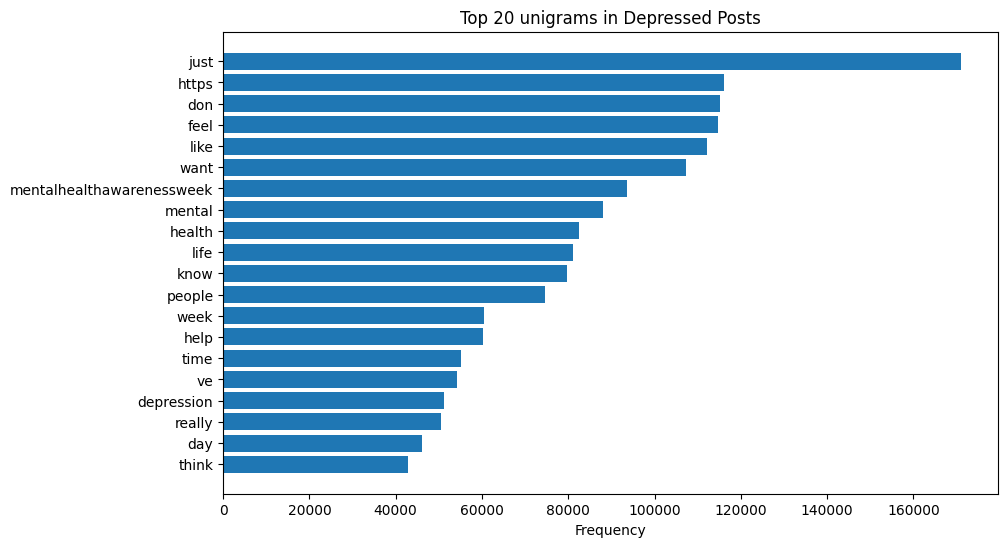

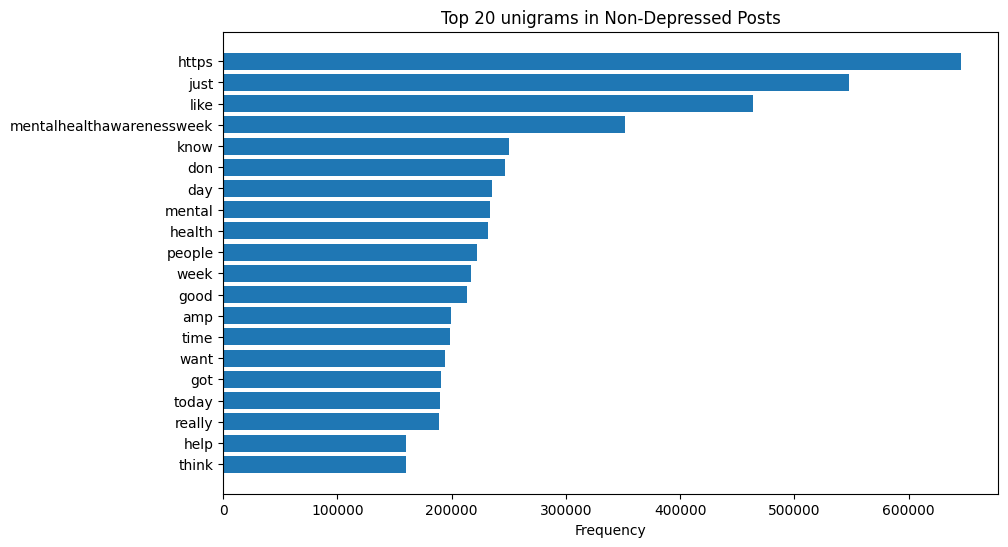

In [76]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts
plot_ngrams(top_depressed_ngrams, "Top 20 unigrams in Depressed Posts")

# Plot for non-depressed posts
plot_ngrams(top_non_depressed_ngrams, "Top 20 unigrams in Non-Depressed Posts")

In [77]:
# Extract the n-grams (without frequencies) from each list
depressed_ngrams = set([ngram for ngram, freq in top_depressed_ngrams])
non_depressed_ngrams = set([ngram for ngram, freq in top_non_depressed_ngrams])

# Find n-grams that appear in both categories
common_ngrams = depressed_ngrams.intersection(non_depressed_ngrams)

# Find n-grams that are unique to each category
depressed_only_ngrams = depressed_ngrams - non_depressed_ngrams
non_depressed_only_ngrams = non_depressed_ngrams - depressed_ngrams

# Display results
print("1-grams common to both depressed and non-depressed posts:")
for ngram in common_ngrams:
    print(ngram)

print("\n1-grams unique to depressed posts:")
for ngram in depressed_only_ngrams:
    print(ngram)

print("\n1-grams unique to non-depressed posts:")
for ngram in non_depressed_only_ngrams:
    print(ngram)


1-grams common to both depressed and non-depressed posts:
mentalhealthawarenessweek
https
day
week
like
think
want
help
really
don
know
health
time
mental
just
people

1-grams unique to depressed posts:
ve
feel
life
depression

1-grams unique to non-depressed posts:
today
amp
good
got


do ngrams on stemmed_text

In [78]:
#filter posts by labels
depressed_posts=df[df['label']==1]['stemmed_text']
non_depressed_posts=df[df['label']==0]['stemmed_text']

In [79]:
#generate n-grams and calculate frequencies
from sklearn.feature_extraction.text import CountVectorizer
def get_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0)
    ngram_freq = [(ngram, ngram_sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 20 unigrams and bigrams for depressed and non-depressed posts
top_depressed_ngrams = get_ngrams(depressed_posts, ngram_range=(1, 1), top_n=20)
top_non_depressed_ngrams = get_ngrams(non_depressed_posts, ngram_range=(1, 1), top_n=20)


In [80]:
#display results
print("Top 20 1-grams in Depressed Posts:")
for ngram, freq in top_depressed_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 1-grams in Non-Depressed Posts:")
for ngram, freq in top_non_depressed_ngrams:
    print(f"{ngram}: {freq}")

Top 20 1-grams in Depressed Posts:
feel: 166617
http: 114764
mentalhealthawarenessweek: 93569
mental: 91358
health: 82390
life: 80633
depress: 78887
peopl: 74364
week: 66094
time: 65435
day: 60943
talk: 48958
friend: 45974
thing: 45711
year: 45616
fuck: 45431
live: 45279
awar: 42650
work: 40918
support: 38841

Top 20 1-grams in Non-Depressed Posts:
http: 583753
mentalhealthawarenessweek: 351869
day: 285270
mental: 238577
week: 237423
health: 231547
time: 231436
peopl: 222197
feel: 218726
good: 214570
friend: 192863
today: 188759
guy: 186955
love: 182432
fuck: 167714
school: 159261
girl: 159072
year: 153140
post: 152902
work: 152629


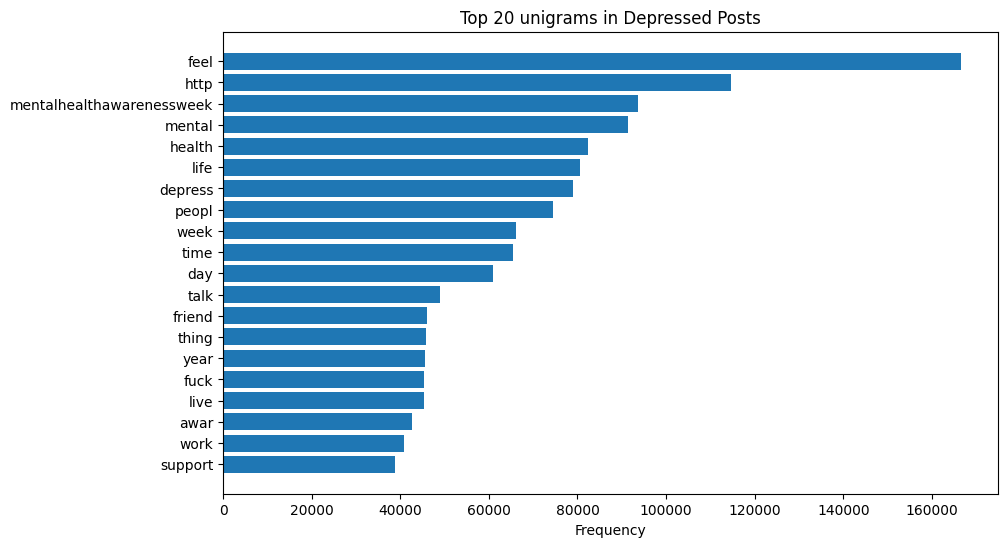

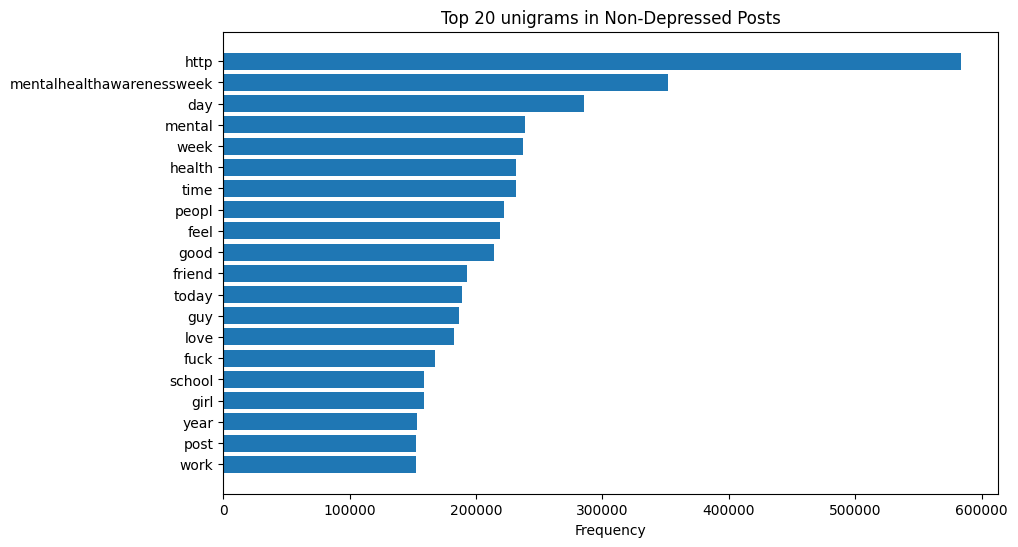

In [81]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts
plot_ngrams(top_depressed_ngrams, "Top 20 unigrams in Depressed Posts")

# Plot for non-depressed posts
plot_ngrams(top_non_depressed_ngrams, "Top 20 unigrams in Non-Depressed Posts")

In [82]:
# Extract the n-grams (without frequencies) from each list
depressed_ngrams = set([ngram for ngram, freq in top_depressed_ngrams])
non_depressed_ngrams = set([ngram for ngram, freq in top_non_depressed_ngrams])

# Find n-grams that appear in both categories
common_ngrams = depressed_ngrams.intersection(non_depressed_ngrams)

# Find n-grams that are unique to each category
depressed_only_ngrams = depressed_ngrams - non_depressed_ngrams
non_depressed_only_ngrams = non_depressed_ngrams - depressed_ngrams

# Display results
print("1-grams common to both depressed and non-depressed posts:")
for ngram in common_ngrams:
    print(ngram)

print("\n1-grams unique to depressed posts:")
for ngram in depressed_only_ngrams:
    print(ngram)

print("\n1-grams unique to non-depressed posts:")
for ngram in non_depressed_only_ngrams:
    print(ngram)


1-grams common to both depressed and non-depressed posts:
work
mentalhealthawarenessweek
peopl
day
friend
week
http
fuck
health
time
mental
feel
year

1-grams unique to depressed posts:
awar
support
talk
life
thing
live
depress

1-grams unique to non-depressed posts:
today
good
guy
girl
post
school
love


getting ngrams by sentiment. 
analysing the n grams across both depressed and non-depressed posts for various sentiments(positive, neutral and negative) can provide insights.
- reveal different linguistic patterns across different sentiments
- sentiment-language interaction: analysing n-grams per sentiment. eg. positive sentiment in depressed posts will use different language compared to positive sentiment in non depressed posts
- finding which n-grams are unique

understanding positive, negative and neutral sentiments for depressed and non-depressed posts

Depressed posts

In [83]:
# Filter posts by label and sentiment
depressed_positive = df[(df['label'] == 1) & (df['sentiment'] == 'Positive')]['text']
depressed_negative = df[(df['label'] == 1) & (df['sentiment'] == 'Negative')]['text']
depressed_neutral = df[(df['label'] == 1) & (df['sentiment'] == 'Neutral')]['text']

# Get n-grams for each sentiment within the depressed group
top_depressed_positive_ngrams = get_ngrams(depressed_positive, ngram_range=(1, 1), top_n=20)
top_depressed_negative_ngrams = get_ngrams(depressed_negative, ngram_range=(1, 1), top_n=20)
top_depressed_neutral_ngrams = get_ngrams(depressed_neutral, ngram_range=(1, 1), top_n=20)

In [84]:
#display results
print("Top 20 1-grams in Depressed Posts that have positive sentiment:")
for ngram, freq in top_depressed_positive_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 1-grams in Depressed Posts that have negative sentiment:")
for ngram, freq in top_depressed_negative_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 1-grams in Depressed Posts that have neutral sentiment:")
for ngram, freq in top_depressed_neutral_ngrams:
    print(f"{ngram}: {freq}")

Top 20 1-grams in Depressed Posts that have positive sentiment:
https: 76624
mentalhealthawarenessweek: 61763
mental: 56800
health: 55627
just: 40979
week: 39054
feel: 32688
like: 31604
help: 28918
people: 28325
don: 27599
awareness: 27324
support: 25063
want: 24429
know: 23823
mentalhealth: 23326
life: 23054
time: 21167
good: 17692
friends: 17578

Top 20 1-grams in Depressed Posts that have negative sentiment:
just: 123699
don: 83314
want: 79029
feel: 78232
like: 76799
life: 55194
know: 53099
people: 44183
depression: 43090
ve: 39072
https: 33250
really: 33153
time: 31993
think: 29609
going: 28852
help: 28759
die: 28438
mentalhealthawarenessweek: 28081
mental: 27132
day: 26510

Top 20 1-grams in Depressed Posts that have neutral sentiment:
just: 6410
https: 6344
don: 4155
health: 4032
mental: 4031
want: 3955
feel: 3849
like: 3779
mentalhealthawarenessweek: 3722
week: 3219
know: 2769
life: 2758
talk: 2571
help: 2483
awareness: 2351
need: 2171
mentalhealth: 2120
people: 2060
time: 2028


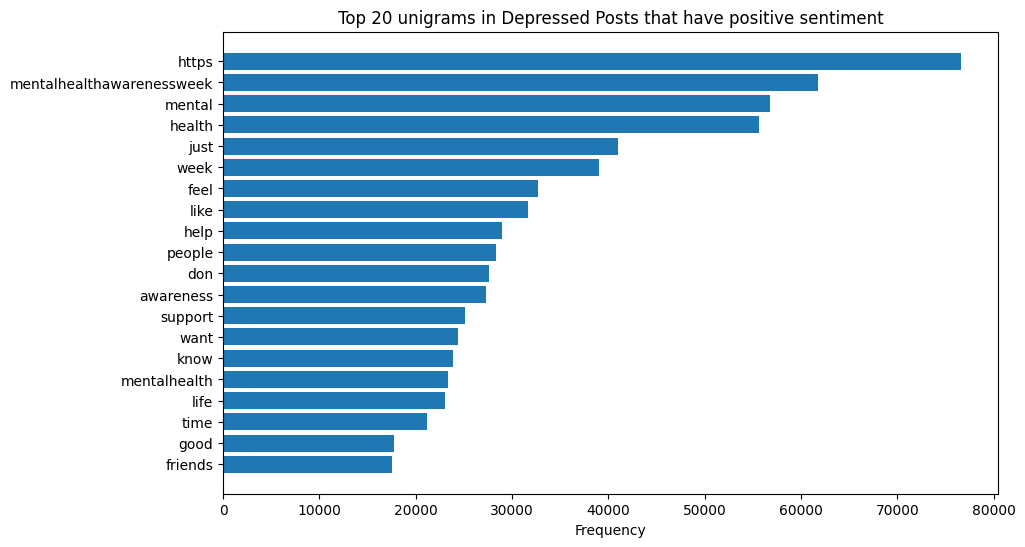

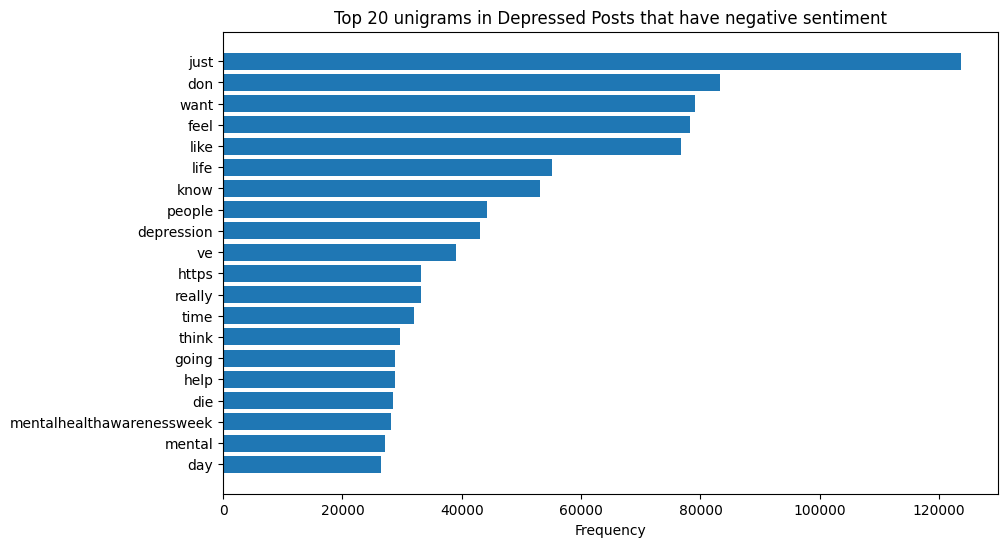

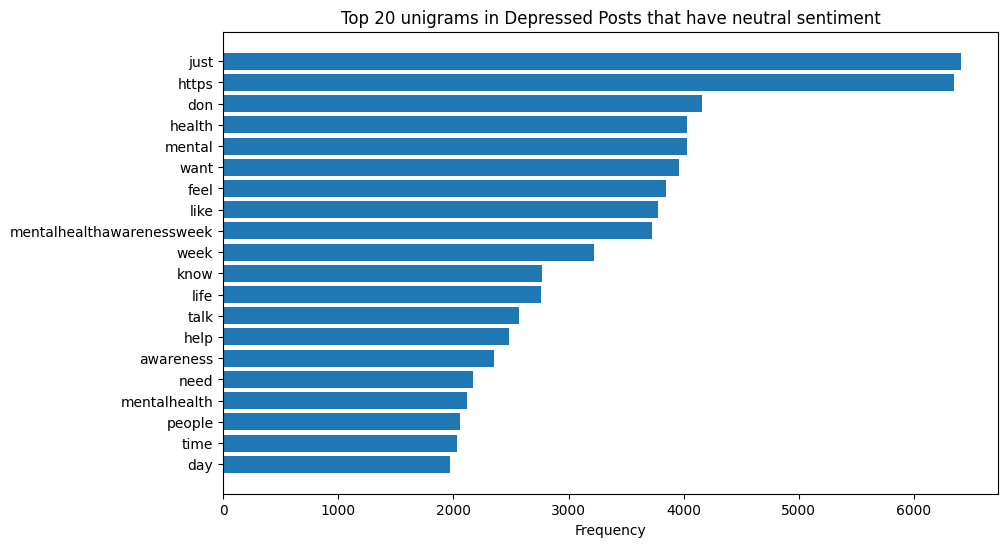

In [85]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts,positive sentiment
plot_ngrams(top_depressed_positive_ngrams, "Top 20 unigrams in Depressed Posts that have positive sentiment")

# Plot for depressed posts,negative sentiment
plot_ngrams(top_depressed_negative_ngrams, "Top 20 unigrams in Depressed Posts that have negative sentiment")

# Plot for depressed posts,neutral sentiment
plot_ngrams(top_depressed_neutral_ngrams, "Top 20 unigrams in Depressed Posts that have neutral sentiment")

Non depressed posts

In [86]:
# Filter posts by label and sentiment
non_depressed_positive = df[(df['label'] == 0) & (df['sentiment'] == 'Positive')]['text']
non_depressed_negative = df[(df['label'] == 0) & (df['sentiment'] == 'Negative')]['text']
non_depressed_neutral = df[(df['label'] == 0) & (df['sentiment'] == 'Neutral')]['text']

# Get n-grams for each sentiment within the depressed group
top_non_depressed_positive_ngrams = get_ngrams(non_depressed_positive, ngram_range=(1, 1), top_n=20)
top_non_depressed_negative_ngrams = get_ngrams(non_depressed_negative, ngram_range=(1, 1), top_n=20)
top_non_depressed_neutral_ngrams = get_ngrams(non_depressed_neutral, ngram_range=(1, 1), top_n=20)

In [87]:
#display results
print("Top 20 1-grams in Non-depressed Posts that have positive sentiment:")
for ngram, freq in top_non_depressed_positive_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 1-grams in Non-depressed Posts that have negative sentiment:")
for ngram, freq in top_non_depressed_negative_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 1-grams in Non-depressed Posts that have neutral sentiment:")
for ngram, freq in top_non_depressed_neutral_ngrams:
    print(f"{ngram}: {freq}")

Top 20 1-grams in Non-depressed Posts that have positive sentiment:
https: 421815
mentalhealthawarenessweek: 258916
just: 226500
like: 195162
health: 163256
mental: 163165
good: 160850
week: 137371
day: 126970
amp: 118862
love: 117830
know: 114277
people: 101749
time: 98888
today: 98384
don: 96628
awareness: 89045
help: 88051
really: 87220
friends: 81922

Top 20 1-grams in Non-depressed Posts that have negative sentiment:
just: 253646
like: 208560
don: 121001
https: 103635
know: 101788
people: 91713
want: 88540
got: 86850
really: 86174
day: 78921
time: 74652
im: 74578
feel: 70748
fucking: 69226
fuck: 68896
shit: 68699
school: 68560
today: 68106
going: 67738
think: 67531

Top 20 1-grams in Non-depressed Posts that have neutral sentiment:
https: 120419
just: 67260
like: 59629
mentalhealthawarenessweek: 45130
health: 37761
mental: 36885
week: 36646
know: 34423
guys: 32300
amp: 29272
day: 29254
people: 28793
don: 28654
awareness: 27588
school: 25578
time: 24883
post: 24877
want: 24475
got:

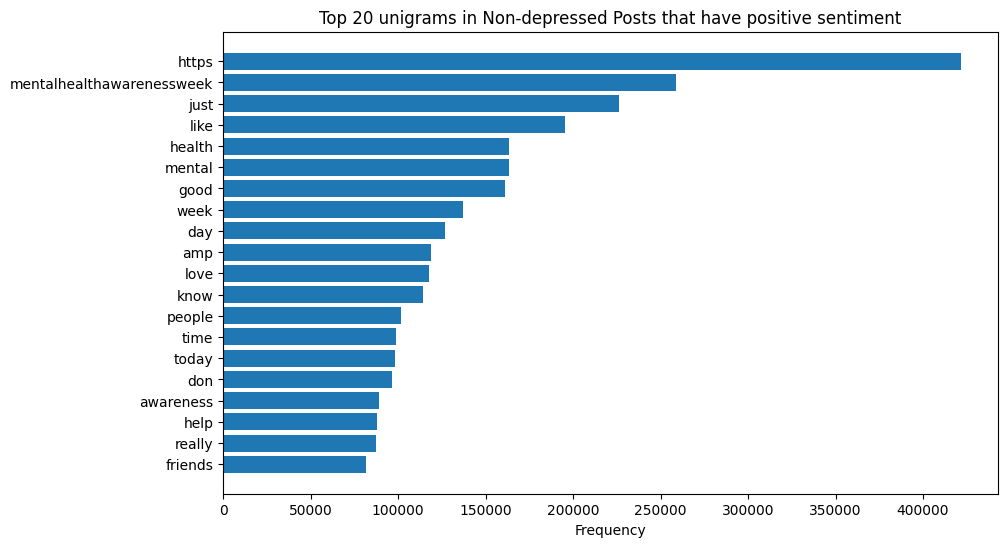

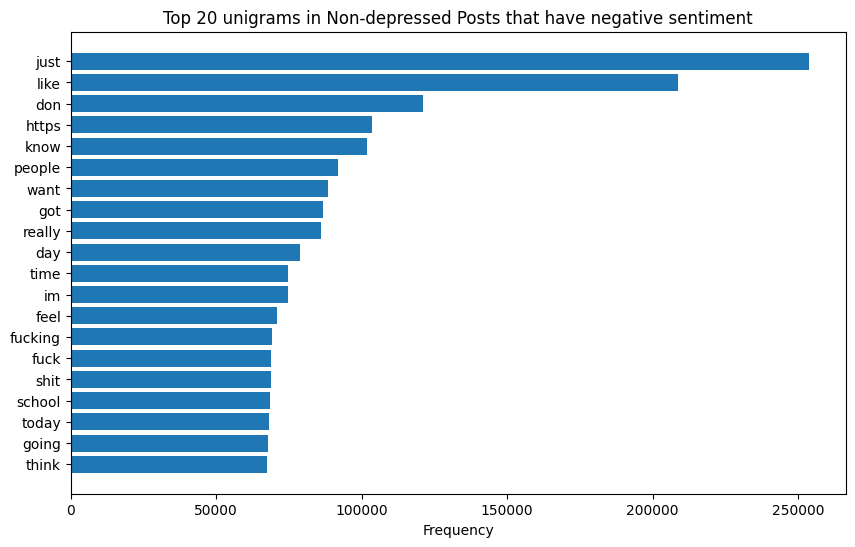

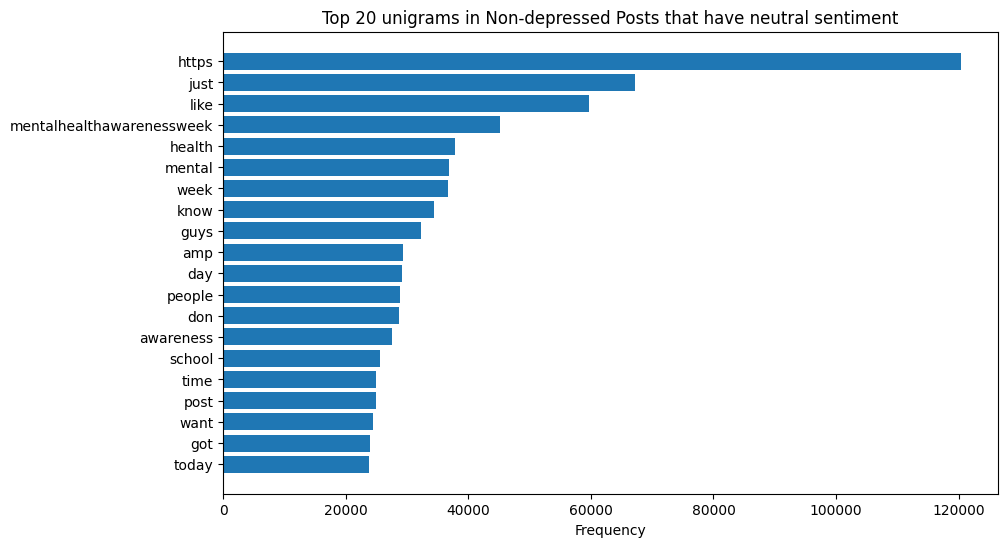

In [88]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts,positive sentiment
plot_ngrams(top_non_depressed_positive_ngrams, "Top 20 unigrams in Non-depressed Posts that have positive sentiment")

# Plot for depressed posts,negative sentiment
plot_ngrams(top_non_depressed_negative_ngrams, "Top 20 unigrams in Non-depressed Posts that have negative sentiment")

# Plot for depressed posts,neutral sentiment
plot_ngrams(top_non_depressed_neutral_ngrams, "Top 20 unigrams in Non-depressed Posts that have neutral sentiment")

In [89]:
%pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Common Positive 1-grams (Depressed & Non-Depressed): {'mentalhealthawarenessweek', 'https', 'good', 'week', 'like', 'friends', 'don', 'help', 'know', 'health', 'time', 'mental', 'just', 'people', 'awareness'}
Unique Positive 1-grams in Depressed: {'support', 'want', 'life', 'mentalhealth', 'feel'}
Unique Positive 1-grams in Non-Depressed: {'today', 'day', 'really', 'love', 'amp'}

Common Negative 1-grams (Depressed & Non-Depressed): {'https', 'day', 'like', 'think', 'want', 'really', 'going', 'don', 'know', 'time', 'feel', 'just', 'people'}
Unique Negative 1-grams in Depressed: {'ve', 'mentalhealthawarenessweek', 'depression', 'die', 'help', 'life', 'mental'}
Unique Negative 1-grams in Non-Depressed: {'im', 'today', 'fuck', 'school', 'got', 'shit', 'fucking'}

Common Neutral 1-grams (Depressed & Non-Depressed): {'mentalhealthawarenessweek', 'https', 'day', 'week', 'like', 'want', 'don', 'know', 'health', 'time', 'mental', 'just', 'people', 'awareness'}
Unique Neutral 1-grams in Depress

c:\Python310\lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


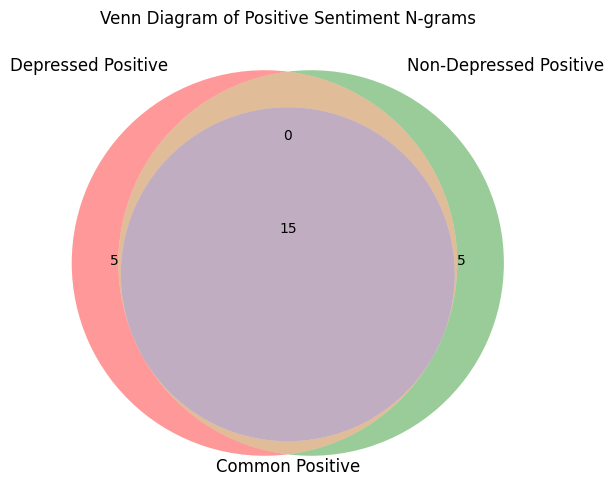

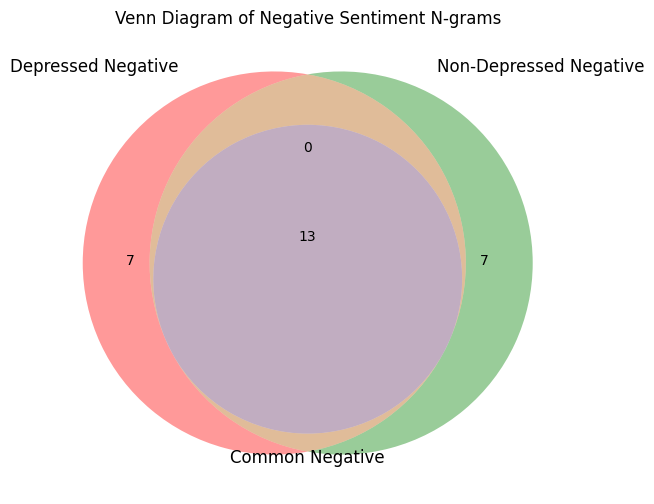

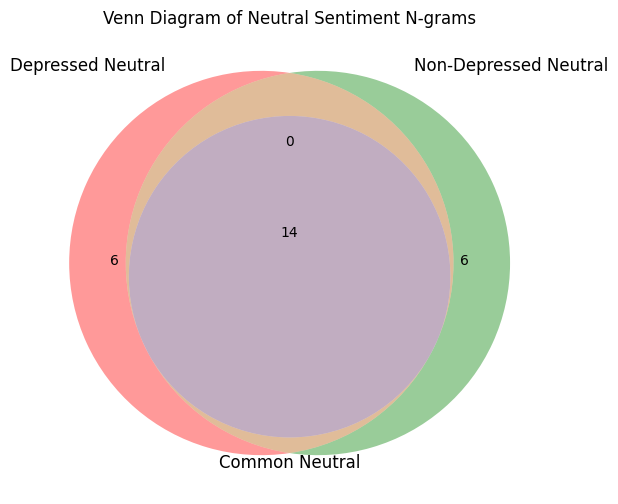

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Sample data (use your actual data lists here)
# Format: List of tuples (ngram, frequency)

# Extract n-grams from each list (without frequencies)
non_depressed_positive_set = set([ngram for ngram, _ in top_non_depressed_positive_ngrams])
non_depressed_negative_set = set([ngram for ngram, _ in top_non_depressed_negative_ngrams])
non_depressed_neutral_set = set([ngram for ngram, _ in top_non_depressed_neutral_ngrams])

depressed_positive_set = set([ngram for ngram, _ in top_depressed_positive_ngrams])
depressed_negative_set = set([ngram for ngram, _ in top_depressed_negative_ngrams])
depressed_neutral_set = set([ngram for ngram, _ in top_depressed_neutral_ngrams])

# Common and unique n-grams
positive_common_ngrams = depressed_positive_set.intersection(non_depressed_positive_set)
positive_unique_depressed = depressed_positive_set - non_depressed_positive_set
positive_unique_non_depressed = non_depressed_positive_set - depressed_positive_set

negative_common_ngrams = depressed_negative_set.intersection(non_depressed_negative_set)
negative_unique_depressed = depressed_negative_set - non_depressed_negative_set
negative_unique_non_depressed = non_depressed_negative_set - depressed_negative_set

neutral_common_ngrams = depressed_neutral_set.intersection(non_depressed_neutral_set)
neutral_unique_depressed = depressed_neutral_set - non_depressed_neutral_set
neutral_unique_non_depressed = non_depressed_neutral_set - depressed_neutral_set

# Print Results
print("Common Positive 1-grams (Depressed & Non-Depressed):", positive_common_ngrams)
print("Unique Positive 1-grams in Depressed:", positive_unique_depressed)
print("Unique Positive 1-grams in Non-Depressed:", positive_unique_non_depressed)

print("\nCommon Negative 1-grams (Depressed & Non-Depressed):", negative_common_ngrams)
print("Unique Negative 1-grams in Depressed:", negative_unique_depressed)
print("Unique Negative 1-grams in Non-Depressed:", negative_unique_non_depressed)

print("\nCommon Neutral 1-grams (Depressed & Non-Depressed):", neutral_common_ngrams)
print("Unique Neutral 1-grams in Depressed:", neutral_unique_depressed)
print("Unique Neutral 1-grams in Non-Depressed:", neutral_unique_non_depressed)

# Visualization: Venn diagrams for each sentiment category
# Ensure matplotlib_venn is installed with: pip install matplotlib-venn

# Positive Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_positive_set, non_depressed_positive_set, positive_common_ngrams],
      set_labels=('Depressed Positive', 'Non-Depressed Positive', 'Common Positive'))
plt.title("Venn Diagram of Positive Sentiment 1-grams")
plt.show()

# Negative Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_negative_set, non_depressed_negative_set, negative_common_ngrams],
      set_labels=('Depressed Negative', 'Non-Depressed Negative', 'Common Negative'))
plt.title("Venn Diagram of Negative Sentiment 1-grams")
plt.show()

# Neutral Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_neutral_set, non_depressed_neutral_set, neutral_common_ngrams],
      set_labels=('Depressed Neutral', 'Non-Depressed Neutral', 'Common Neutral'))
plt.title("Venn Diagram of Neutral Sentiment 1-grams")
plt.show()


Repeat exactly what was done above but for bigrams.

doing bigrams on 'text'

In [91]:
#filter posts by labels
depressed_posts=df[df['label']==1]['text']
non_depressed_posts=df[df['label']==0]['text']

In [92]:
#generate n-grams and calculate frequencies
from sklearn.feature_extraction.text import CountVectorizer
def get_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0)
    ngram_freq = [(ngram, ngram_sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 20 unigrams and bigrams for depressed and non-depressed posts
top_depressed_ngrams = get_ngrams(depressed_posts, ngram_range=(2, 2), top_n=20)
top_non_depressed_ngrams = get_ngrams(non_depressed_posts, ngram_range=(2, 2), top_n=20)


In [93]:
#display results
print("Top 20 2-grams in Depressed Posts:")
for ngram, freq in top_depressed_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 2-grams in Non-Depressed Posts:")
for ngram, freq in top_non_depressed_ngrams:
    print(f"{ngram}: {freq}")

Top 20 2-grams in Depressed Posts:
mental health: 74641
feel like: 38888
awareness week: 33322
health awareness: 30593
don know: 29045
don want: 24880
just want: 21939
mentalhealthawarenessweek https: 17236
want die: 11375
https https: 8801
just don: 7532
feels like: 7011
eating disorder: 6989
eating disorders: 6805
https mentalhealthawarenessweek: 6652
just feel: 6137
don think: 5566
don feel: 5029
mentalhealth https: 4854
mentalhealthawarenessweek mentalhealth: 4579

Top 20 2-grams in Non-Depressed Posts:
mental health: 210563
awareness week: 113733
health awareness: 101924
mentalhealthawarenessweek https: 84176
https https: 62828
don know: 47600
feel like: 40972
filler filler: 39286
https mentalhealthawarenessweek: 30137
amp x200b: 28197
just got: 27572
eating disorders: 25345
don want: 21963
twitpic com: 19642
eating disorder: 19499
http twitpic: 19478
https www: 19277
just want: 18250
need help: 15829
high school: 13929


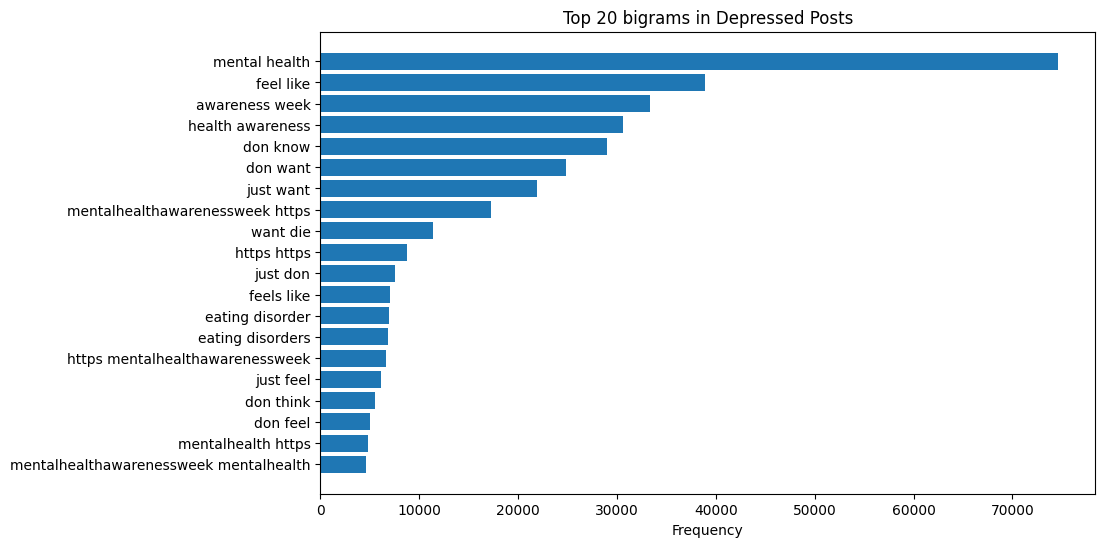

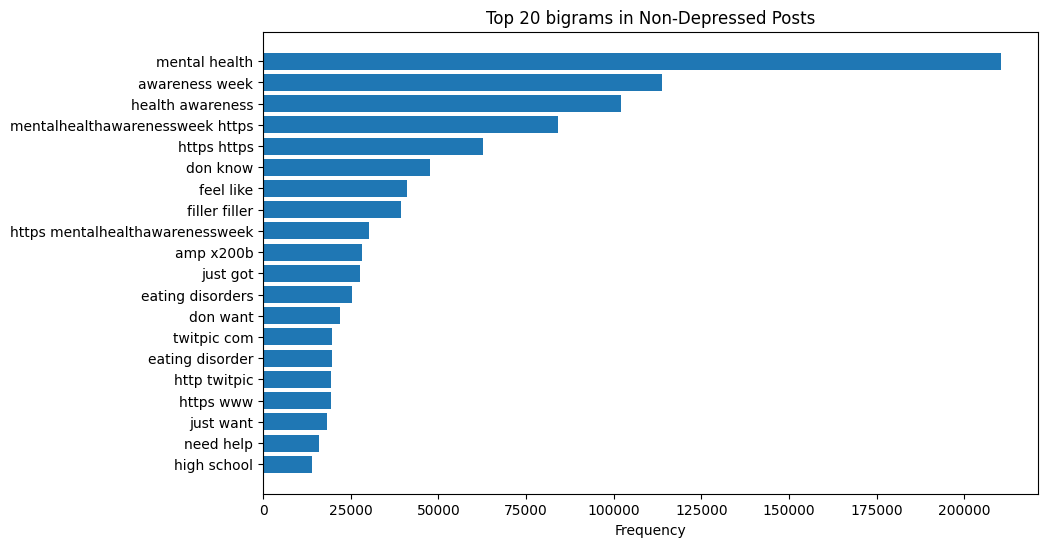

In [94]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts
plot_ngrams(top_depressed_ngrams, "Top 20 bigrams in Depressed Posts")

# Plot for non-depressed posts
plot_ngrams(top_non_depressed_ngrams, "Top 20 bigrams in Non-Depressed Posts")

In [95]:
# Extract the n-grams (without frequencies) from each list
depressed_ngrams = set([ngram for ngram, freq in top_depressed_ngrams])
non_depressed_ngrams = set([ngram for ngram, freq in top_non_depressed_ngrams])

# Find n-grams that appear in both categories
common_ngrams = depressed_ngrams.intersection(non_depressed_ngrams)

# Find n-grams that are unique to each category
depressed_only_ngrams = depressed_ngrams - non_depressed_ngrams
non_depressed_only_ngrams = non_depressed_ngrams - depressed_ngrams

# Display results
print("2-grams common to both depressed and non-depressed posts:")
for ngram in common_ngrams:
    print(ngram)

print("\n2-grams unique to depressed posts:")
for ngram in depressed_only_ngrams:
    print(ngram)

print("\n2-grams unique to non-depressed posts:")
for ngram in non_depressed_only_ngrams:
    print(ngram)


2-grams common to both depressed and non-depressed posts:
don know
just want
eating disorder
https https
awareness week
health awareness
eating disorders
mentalhealthawarenessweek https
don want
mental health
feel like
https mentalhealthawarenessweek

2-grams unique to depressed posts:
don think
don feel
mentalhealthawarenessweek mentalhealth
want die
just don
mentalhealth https
just feel
feels like

2-grams unique to non-depressed posts:
high school
twitpic com
https www
http twitpic
amp x200b
just got
filler filler
need help


doing bigrams on 'stremmed_text'

In [96]:
#filter posts by labels
depressed_posts=df[df['label']==1]['stemmed_text']
non_depressed_posts=df[df['label']==0]['stemmed_text']

In [97]:
#generate n-grams and calculate frequencies
from sklearn.feature_extraction.text import CountVectorizer
def get_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0)
    ngram_freq = [(ngram, ngram_sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 20 unigrams and bigrams for depressed and non-depressed posts
top_depressed_ngrams = get_ngrams(depressed_posts, ngram_range=(2, 2), top_n=20)
top_non_depressed_ngrams = get_ngrams(non_depressed_posts, ngram_range=(2, 2), top_n=20)


In [98]:
#display results
print("Top 20 2-grams in Depressed Posts:")
for ngram, freq in top_depressed_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 2-grams in Non-Depressed Posts:")
for ngram, freq in top_non_depressed_ngrams:
    print(f"{ngram}: {freq}")

Top 20 2-grams in Depressed Posts:
mental health: 74627
awar week: 33420
health awar: 30666
mentalhealthawarenessweek http: 17299
eat disord: 13812
http http: 8828
http mentalhealthawarenessweek: 6687
mental ill: 5770
mentalhealth http: 4911
week mental: 4698
mentalhealthawarenessweek mentalhealth: 4656
depress anxieti: 4492
suicid thought: 4394
feel feel: 4388
friend famili: 3876
commit suicid: 3783
disord awar: 3737
support mental: 3707
feel lone: 3527
anxieti depress: 3467

Top 20 2-grams in Non-Depressed Posts:
mental health: 210546
awar week: 113915
health awar: 102071
mentalhealthawarenessweek http: 84993
http http: 63139
eat disord: 44898
filler filler: 39384
http mentalhealthawarenessweek: 30343
disord awar: 15514
week http: 14307
high school: 13930
eatingdisord http: 13483
good morn: 13297
mentalhealth http: 12133
week mentalhealthawarenessweek: 11811
good day: 10632
http eatingdisord: 9569
feel good: 9516
rais awar: 9277
health http: 9163


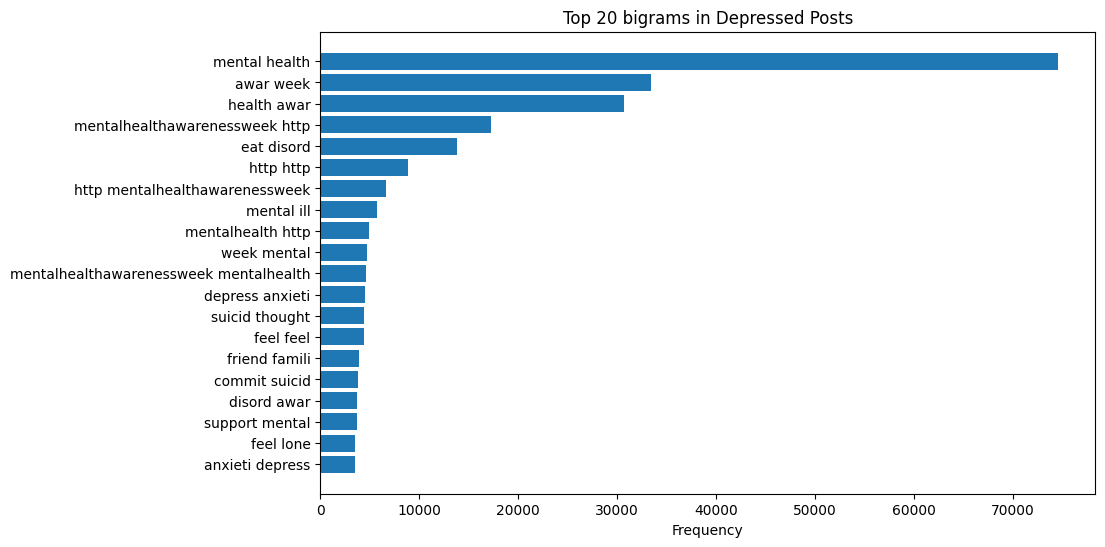

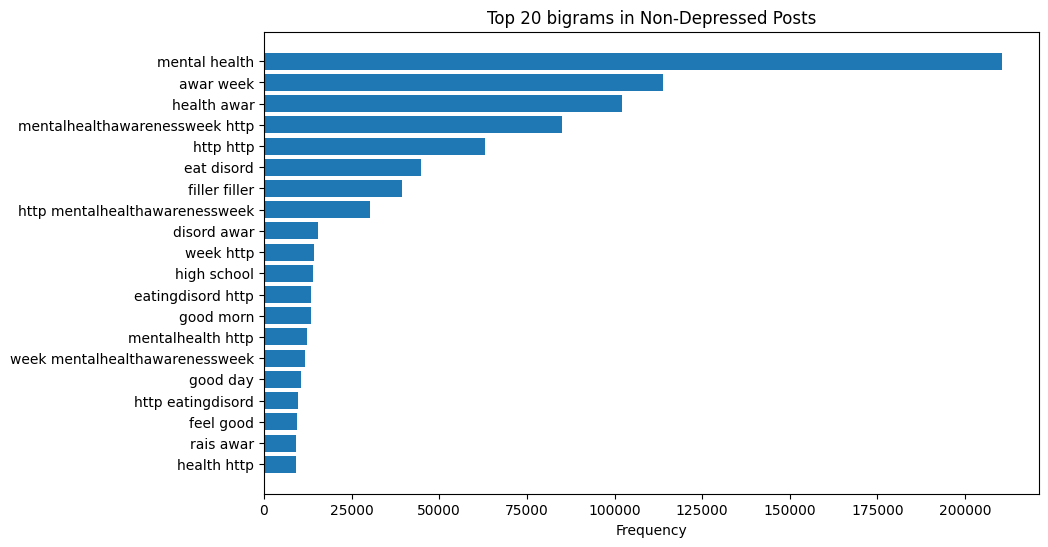

In [99]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts
plot_ngrams(top_depressed_ngrams, "Top 20 bigrams in Depressed Posts")

# Plot for non-depressed posts
plot_ngrams(top_non_depressed_ngrams, "Top 20 bigrams in Non-Depressed Posts")

In [100]:
# Extract the n-grams (without frequencies) from each list
depressed_ngrams = set([ngram for ngram, freq in top_depressed_ngrams])
non_depressed_ngrams = set([ngram for ngram, freq in top_non_depressed_ngrams])

# Find n-grams that appear in both categories
common_ngrams = depressed_ngrams.intersection(non_depressed_ngrams)

# Find n-grams that are unique to each category
depressed_only_ngrams = depressed_ngrams - non_depressed_ngrams
non_depressed_only_ngrams = non_depressed_ngrams - depressed_ngrams

# Display results
print("2-grams common to both depressed and non-depressed posts:")
for ngram in common_ngrams:
    print(ngram)

print("\n2-grams unique to depressed posts:")
for ngram in depressed_only_ngrams:
    print(ngram)

print("\n2-grams unique to non-depressed posts:")
for ngram in non_depressed_only_ngrams:
    print(ngram)


2-grams common to both depressed and non-depressed posts:
http http
eat disord
http mentalhealthawarenessweek
awar week
disord awar
health awar
mental health
mentalhealthawarenessweek http
mentalhealth http

2-grams unique to depressed posts:
depress anxieti
mentalhealthawarenessweek mentalhealth
week mental
feel lone
commit suicid
friend famili
suicid thought
mental ill
anxieti depress
feel feel
support mental

2-grams unique to non-depressed posts:
good day
feel good
eatingdisord http
high school
good morn
week http
health http
rais awar
http eatingdisord
week mentalhealthawarenessweek
filler filler


By sentiment(as done earlier)

Depressed posts

In [101]:
# Filter posts by label and sentiment
depressed_positive = df[(df['label'] == 1) & (df['sentiment'] == 'Positive')]['text']
depressed_negative = df[(df['label'] == 1) & (df['sentiment'] == 'Negative')]['text']
depressed_neutral = df[(df['label'] == 1) & (df['sentiment'] == 'Neutral')]['text']

# Get n-grams for each sentiment within the depressed group
top_depressed_positive_ngrams = get_ngrams(depressed_positive, ngram_range=(2, 2), top_n=20)
top_depressed_negative_ngrams = get_ngrams(depressed_negative, ngram_range=(2, 2), top_n=20)
top_depressed_neutral_ngrams = get_ngrams(depressed_neutral, ngram_range=(2, 2), top_n=20)

In [102]:
#display results
print("Top 20 2-grams in Depressed Posts that have positive sentiment:")
for ngram, freq in top_depressed_positive_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 2-grams in Depressed Posts that have negative sentiment:")
for ngram, freq in top_depressed_negative_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 2-grams in Depressed Posts that have neutral sentiment:")
for ngram, freq in top_depressed_neutral_ngrams:
    print(f"{ngram}: {freq}")

Top 20 2-grams in Depressed Posts that have positive sentiment:
mental health: 50742
awareness week: 22753
health awareness: 21512
mentalhealthawarenessweek https: 11488
feel like: 9635
don know: 6337
https https: 5996
just want: 4772
don want: 4228
https mentalhealthawarenessweek: 4113
eating disorders: 3750
mentalhealth https: 3536
week mental: 3024
mentalhealthawarenessweek mentalhealth: 2911
eating disorder: 2702
week mentalhealthawarenessweek: 2234
mentalhealth mentalhealthawarenessweek: 2111
friends family: 2006
feels like: 1863
just don: 1838

Top 20 2-grams in Depressed Posts that have negative sentiment:
feel like: 27735
don know: 21525
mental health: 20159
don want: 19717
just want: 16187
want die: 10632
awareness week: 8579
health awareness: 7187
just don: 5412
mentalhealthawarenessweek https: 5173
feels like: 4865
just feel: 4571
eating disorder: 4028
don think: 4003
want kill: 3929
depression anxiety: 3494
don feel: 3412
suicidal thoughts: 2936
mental illness: 2930
life ju

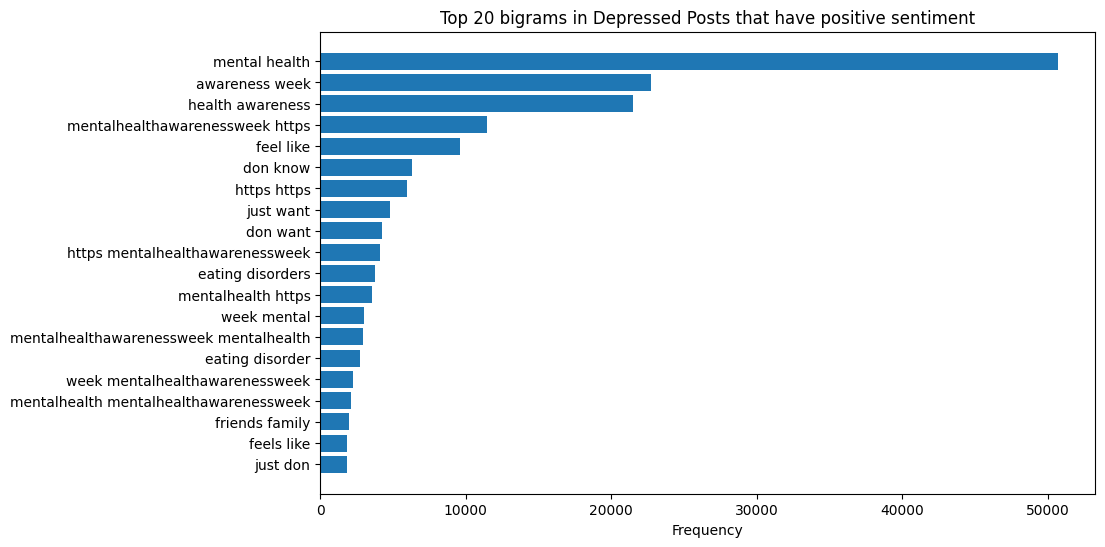

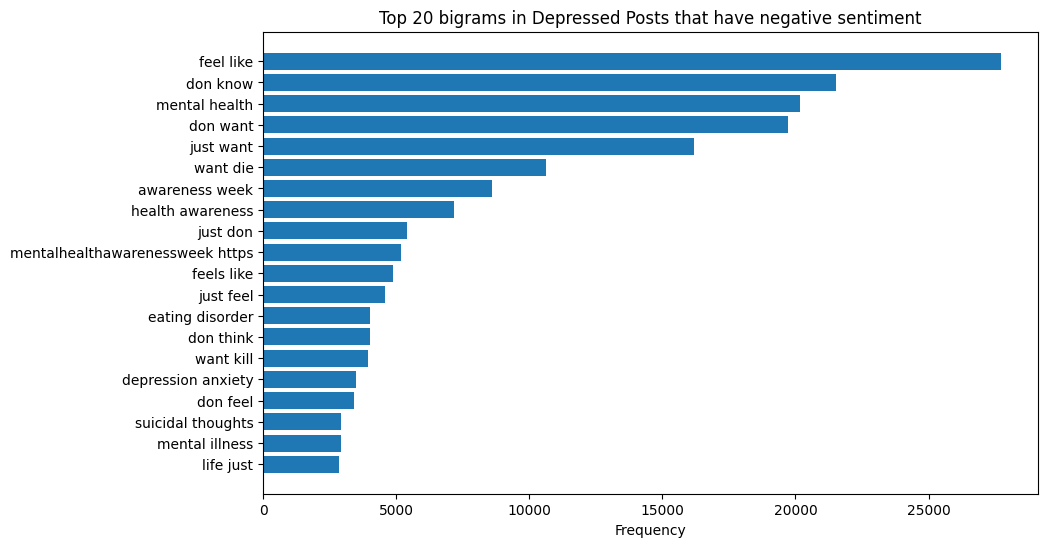

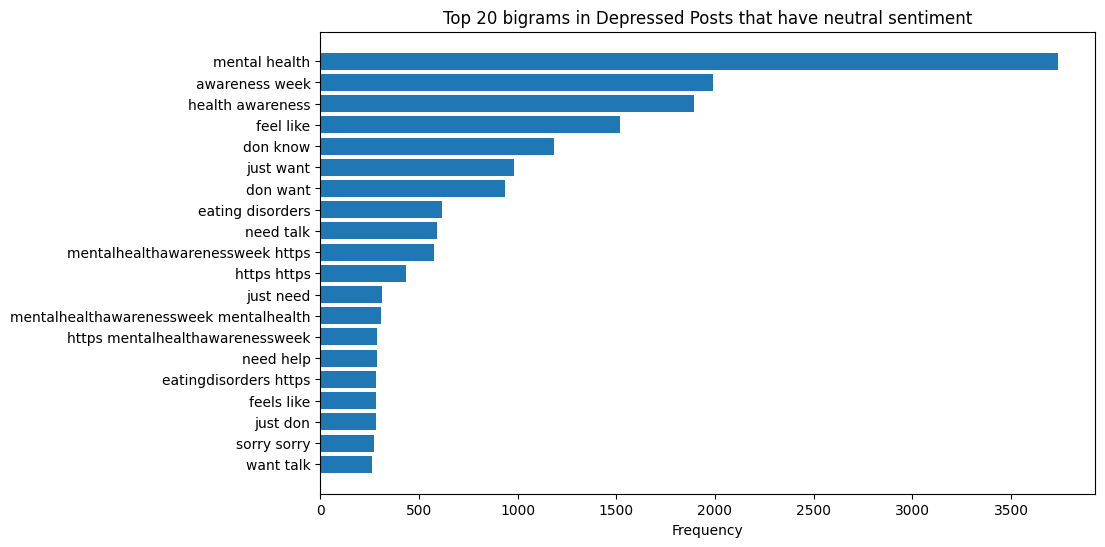

In [103]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts,positive sentiment
plot_ngrams(top_depressed_positive_ngrams, "Top 20 bigrams in Depressed Posts that have positive sentiment")

# Plot for depressed posts,negative sentiment
plot_ngrams(top_depressed_negative_ngrams, "Top 20 bigrams in Depressed Posts that have negative sentiment")

# Plot for depressed posts,neutral sentiment
plot_ngrams(top_depressed_neutral_ngrams, "Top 20 bigrams in Depressed Posts that have neutral sentiment")

Non-depressed posts

In [104]:
# Filter posts by label and sentiment
non_depressed_positive = df[(df['label'] == 0) & (df['sentiment'] == 'Positive')]['text']
non_depressed_negative = df[(df['label'] == 0) & (df['sentiment'] == 'Negative')]['text']
non_depressed_neutral = df[(df['label'] == 0) & (df['sentiment'] == 'Neutral')]['text']

# Get n-grams for each sentiment within the depressed group
top_non_depressed_positive_ngrams = get_ngrams(non_depressed_positive, ngram_range=(2, 2), top_n=20)
top_non_depressed_negative_ngrams = get_ngrams(non_depressed_negative, ngram_range=(2, 2), top_n=20)
top_non_depressed_neutral_ngrams = get_ngrams(non_depressed_neutral, ngram_range=(2, 2), top_n=20)

In [105]:
#display results
print("Top 20 2-grams in Non-depressed Posts that have positive sentiment:")
for ngram, freq in top_non_depressed_positive_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 2-grams in Non-depressed Posts that have negative sentiment:")
for ngram, freq in top_non_depressed_negative_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 2-grams in Non-depressed Posts that have neutral sentiment:")
for ngram, freq in top_non_depressed_neutral_ngrams:
    print(f"{ngram}: {freq}")

Top 20 2-grams in Non-depressed Posts that have positive sentiment:
mental health: 149149
awareness week: 73338
health awareness: 68814
mentalhealthawarenessweek https: 59112
https https: 43177
https mentalhealthawarenessweek: 19468
don know: 18928
feel like: 14719
twitpic com: 13448
eating disorders: 13433
http twitpic: 13331
just got: 11704
good morning: 11142
amp x200b: 10720
filler filler: 10683
bit ly: 9043
http bit: 8994
lt lt: 8993
wish luck: 8760
week mentalhealthawarenessweek: 8645

Top 20 2-grams in Non-depressed Posts that have negative sentiment:
mental health: 26173
don know: 22849
feel like: 22000
awareness week: 15600
mentalhealthawarenessweek https: 12824
don want: 12455
just got: 12357
filler filler: 12318
eating disorder: 11853
health awareness: 10406
https https: 9460
amp x200b: 9169
just want: 8059
twitpic com: 6194
https mentalhealthawarenessweek: 6174
http twitpic: 6147
need help: 5720
don like: 5679
year old: 5552
eating disorders: 5448

Top 20 2-grams in Non-dep

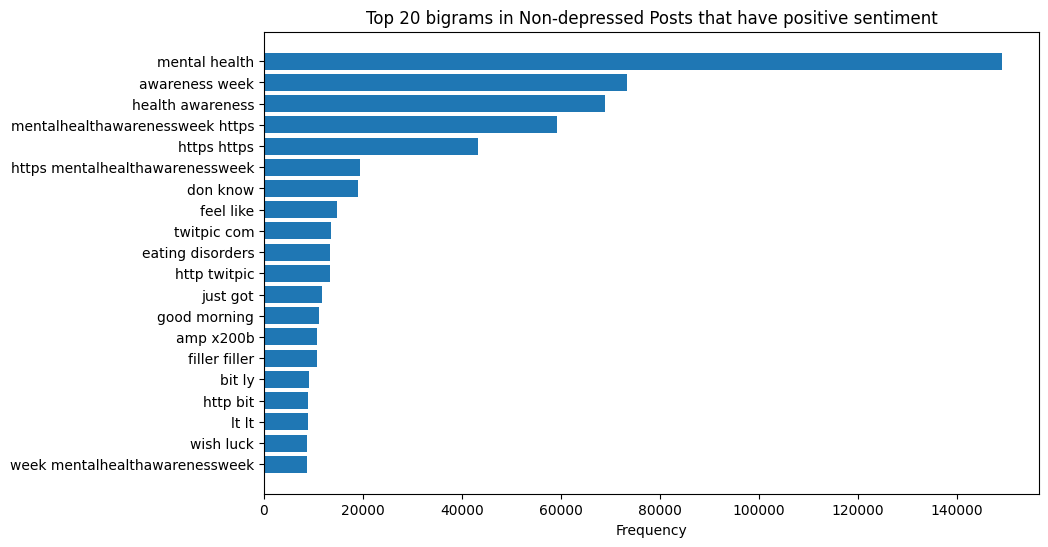

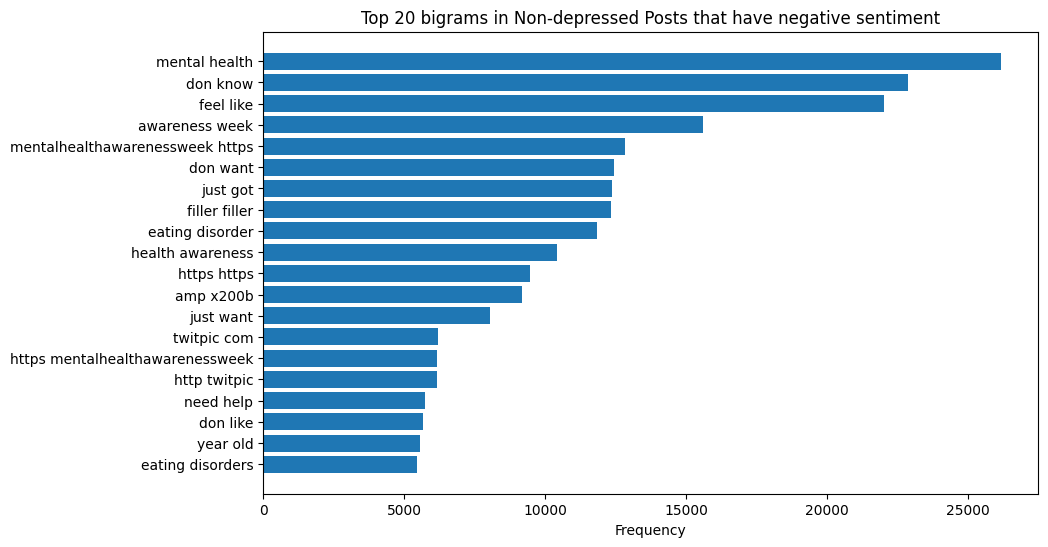

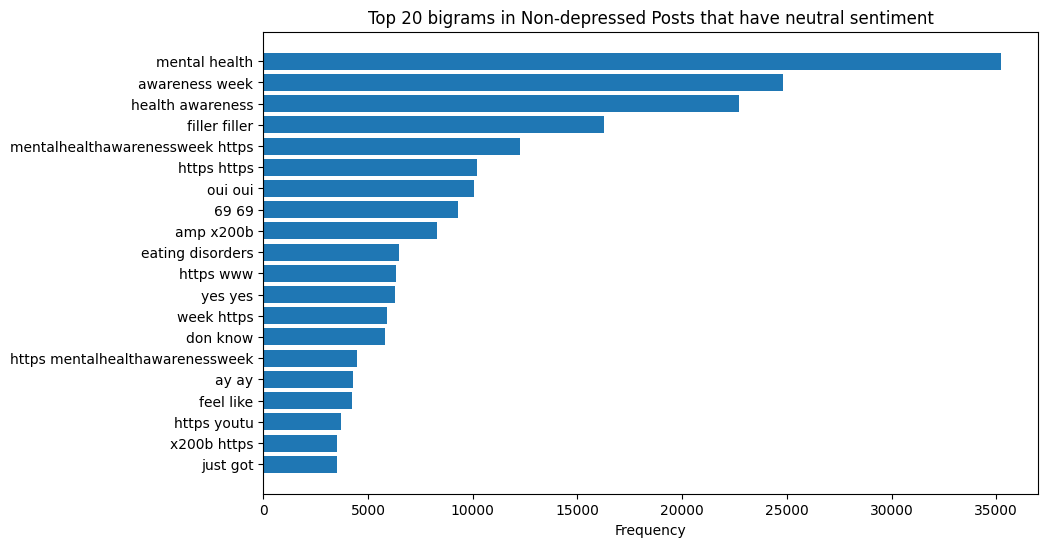

In [106]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts,positive sentiment
plot_ngrams(top_non_depressed_positive_ngrams, "Top 20 bigrams in Non-depressed Posts that have positive sentiment")

# Plot for depressed posts,negative sentiment
plot_ngrams(top_non_depressed_negative_ngrams, "Top 20 bigrams in Non-depressed Posts that have negative sentiment")

# Plot for depressed posts,neutral sentiment
plot_ngrams(top_non_depressed_neutral_ngrams, "Top 20 bigrams in Non-depressed Posts that have neutral sentiment")

Common Positive 2-grams (Depressed & Non-Depressed): {'don know', 'https https', 'awareness week', 'health awareness', 'eating disorders', 'mentalhealthawarenessweek https', 'mental health', 'feel like', 'week mentalhealthawarenessweek', 'https mentalhealthawarenessweek'}
Unique Positive 2-grams in Depressed: {'mentalhealthawarenessweek mentalhealth', 'mentalhealth https', 'just want', 'eating disorder', 'week mental', 'just don', 'friends family', 'mentalhealth mentalhealthawarenessweek', 'feels like', 'don want'}
Unique Positive 2-grams in Non-Depressed: {'lt lt', 'twitpic com', 'bit ly', 'http bit', 'wish luck', 'amp x200b', 'http twitpic', 'just got', 'good morning', 'filler filler'}

Common Negative 2-grams (Depressed & Non-Depressed): {'don know', 'just want', 'eating disorder', 'awareness week', 'health awareness', 'mentalhealthawarenessweek https', 'mental health', 'feel like', 'don want'}
Unique Negative 2-grams in Depressed: {'suicidal thoughts', 'don think', 'don feel', 'men

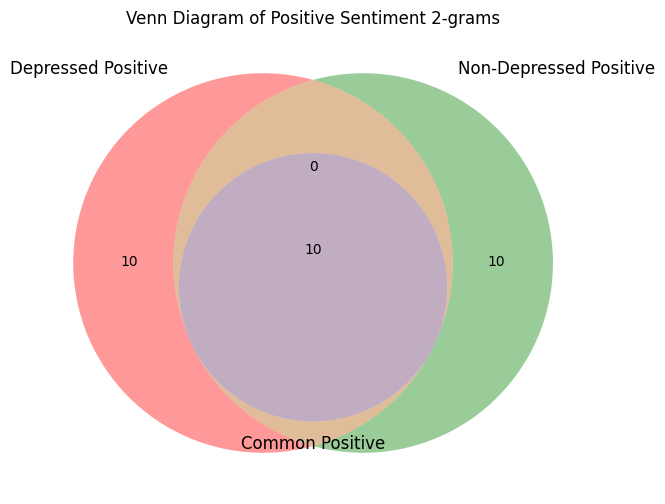

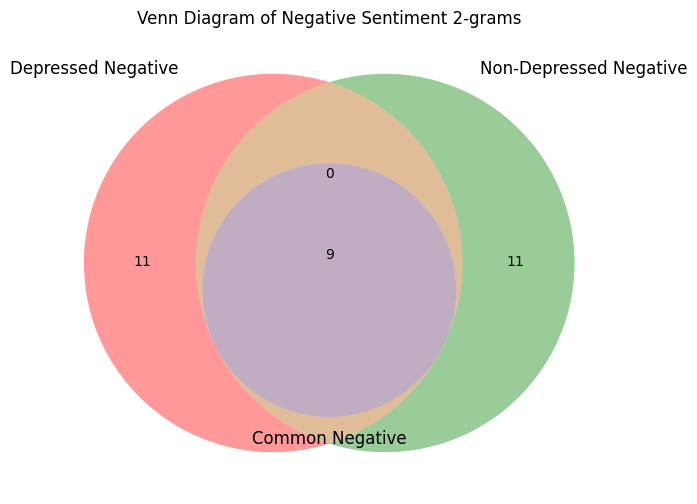

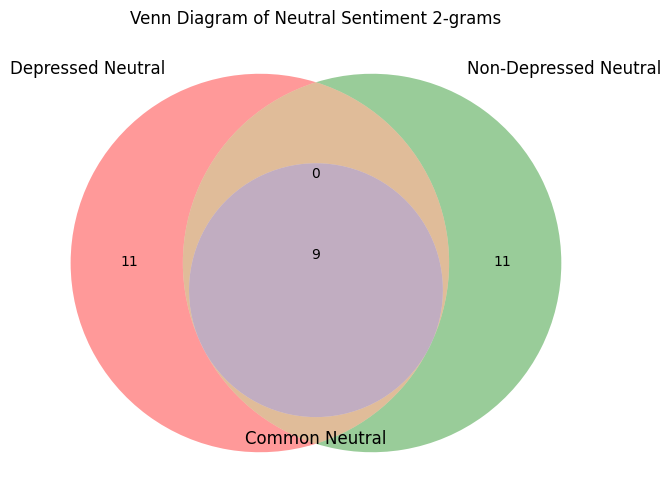

In [107]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Sample data (use your actual data lists here)
# Format: List of tuples (ngram, frequency)

# Extract n-grams from each list (without frequencies)
non_depressed_positive_set = set([ngram for ngram, _ in top_non_depressed_positive_ngrams])
non_depressed_negative_set = set([ngram for ngram, _ in top_non_depressed_negative_ngrams])
non_depressed_neutral_set = set([ngram for ngram, _ in top_non_depressed_neutral_ngrams])

depressed_positive_set = set([ngram for ngram, _ in top_depressed_positive_ngrams])
depressed_negative_set = set([ngram for ngram, _ in top_depressed_negative_ngrams])
depressed_neutral_set = set([ngram for ngram, _ in top_depressed_neutral_ngrams])

# Common and unique n-grams
positive_common_ngrams = depressed_positive_set.intersection(non_depressed_positive_set)
positive_unique_depressed = depressed_positive_set - non_depressed_positive_set
positive_unique_non_depressed = non_depressed_positive_set - depressed_positive_set

negative_common_ngrams = depressed_negative_set.intersection(non_depressed_negative_set)
negative_unique_depressed = depressed_negative_set - non_depressed_negative_set
negative_unique_non_depressed = non_depressed_negative_set - depressed_negative_set

neutral_common_ngrams = depressed_neutral_set.intersection(non_depressed_neutral_set)
neutral_unique_depressed = depressed_neutral_set - non_depressed_neutral_set
neutral_unique_non_depressed = non_depressed_neutral_set - depressed_neutral_set

# Print Results
print("Common Positive 2-grams (Depressed & Non-Depressed):", positive_common_ngrams)
print("Unique Positive 2-grams in Depressed:", positive_unique_depressed)
print("Unique Positive 2-grams in Non-Depressed:", positive_unique_non_depressed)

print("\nCommon Negative 2-grams (Depressed & Non-Depressed):", negative_common_ngrams)
print("Unique Negative 2-grams in Depressed:", negative_unique_depressed)
print("Unique Negative 2-grams in Non-Depressed:", negative_unique_non_depressed)

print("\nCommon Neutral 2-grams (Depressed & Non-Depressed):", neutral_common_ngrams)
print("Unique Neutral 2-grams in Depressed:", neutral_unique_depressed)
print("Unique Neutral 2-grams in Non-Depressed:", neutral_unique_non_depressed)

# Visualization: Venn diagrams for each sentiment category
# Ensure matplotlib_venn is installed with: pip install matplotlib-venn

# Positive Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_positive_set, non_depressed_positive_set, positive_common_ngrams],
      set_labels=('Depressed Positive', 'Non-Depressed Positive', 'Common Positive'))
plt.title("Venn Diagram of Positive Sentiment 2-grams")
plt.show()

# Negative Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_negative_set, non_depressed_negative_set, negative_common_ngrams],
      set_labels=('Depressed Negative', 'Non-Depressed Negative', 'Common Negative'))
plt.title("Venn Diagram of Negative Sentiment 2-grams")
plt.show()

# Neutral Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_neutral_set, non_depressed_neutral_set, neutral_common_ngrams],
      set_labels=('Depressed Neutral', 'Non-Depressed Neutral', 'Common Neutral'))
plt.title("Venn Diagram of Neutral Sentiment 2-grams")
plt.show()


Repeat everything done above, but now for trigrams

do 3- grams on 'text' column 

In [108]:
#filter posts by labels
depressed_posts=df[df['label']==1]['text']
non_depressed_posts=df[df['label']==0]['text']

In [109]:
#generate n-grams and calculate frequencies
from sklearn.feature_extraction.text import CountVectorizer
def get_ngrams(corpus, ngram_range=(3, 3), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0)
    ngram_freq = [(ngram, ngram_sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 20 unigrams and bigrams for depressed and non-depressed posts
top_depressed_ngrams = get_ngrams(depressed_posts, ngram_range=(3, 3), top_n=20)
top_non_depressed_ngrams = get_ngrams(non_depressed_posts, ngram_range=(3, 3), top_n=20)


In [110]:
#display results
print("Top 20 3-grams in Depressed Posts:")
for ngram, freq in top_depressed_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 3-grams in Non-Depressed Posts:")
for ngram, freq in top_non_depressed_ngrams:
    print(f"{ngram}: {freq}")

Top 20 3-grams in Depressed Posts:
mental health awareness: 30366
health awareness week: 29240
week mental health: 4221
https mentalhealthawarenessweek https: 2475
mental health issues: 2448
just feel like: 2259
just want die: 2175
don know anymore: 2166
eating disorder awareness: 2012
disorder awareness week: 1983
don want live: 1974
don feel like: 1938
just don know: 1879
just don want: 1801
eating disorders awareness: 1692
disorders awareness week: 1670
mental health problems: 1629
don want die: 1587
support mental health: 1556
just want end: 1541

Top 20 3-grams in Non-Depressed Posts:
mental health awareness: 101213
health awareness week: 97443
filler filler filler: 33601
http twitpic com: 19477
http bit ly: 13004
https mentalhealthawarenessweek https: 11846
awareness week https: 11302
oui oui oui: 10017
69 69 69: 9263
amp x200b amp: 9257
x200b amp x200b: 9255
lt lt lt: 9008
week mental health: 7862
www youtube com: 7859
www reddit com: 7847
eating disorder awareness: 7775
amp amp

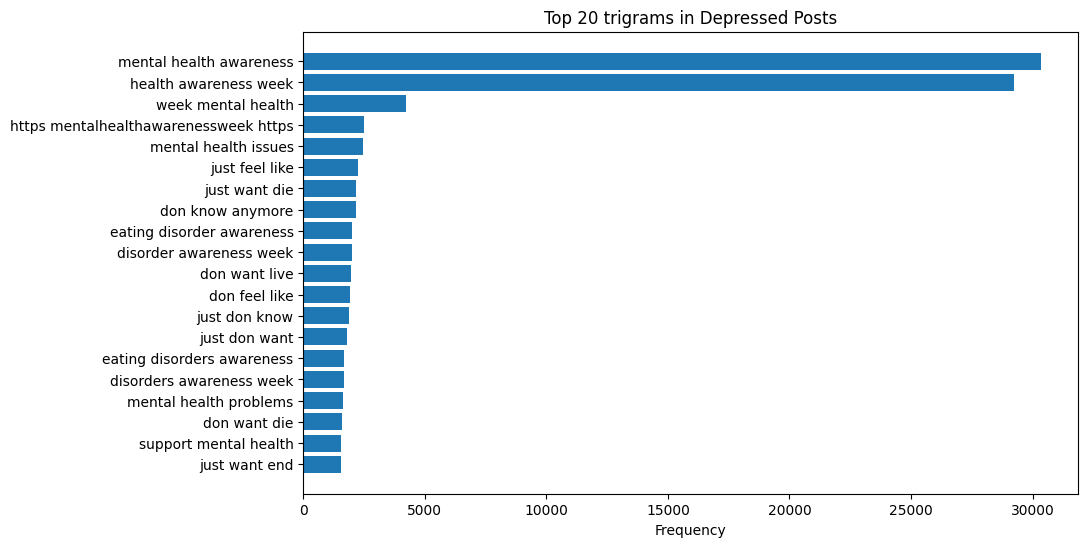

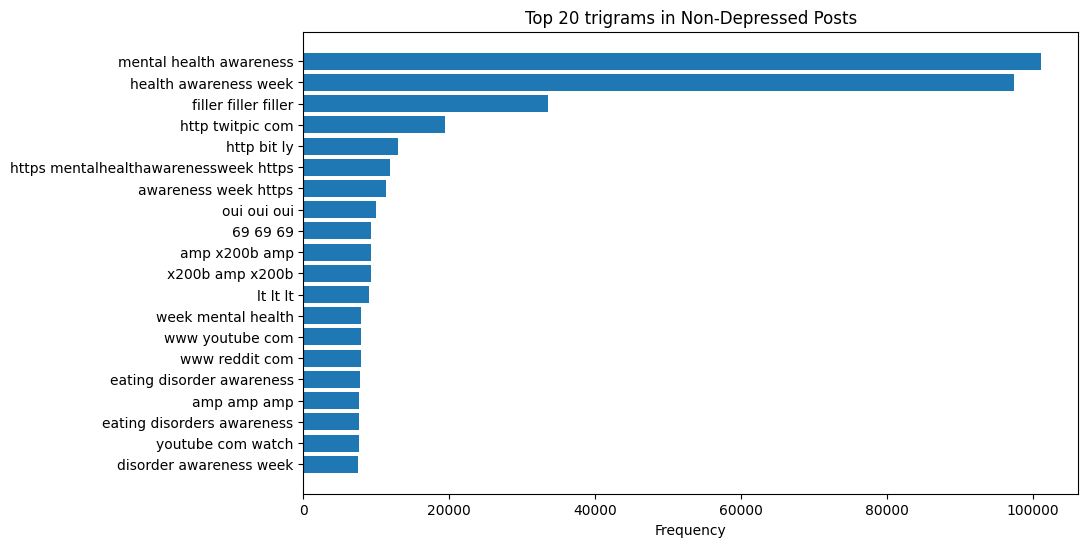

In [111]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts
plot_ngrams(top_depressed_ngrams, "Top 20 trigrams in Depressed Posts")

# Plot for non-depressed posts
plot_ngrams(top_non_depressed_ngrams, "Top 20 trigrams in Non-Depressed Posts")

In [112]:
# Extract the n-grams (without frequencies) from each list
depressed_ngrams = set([ngram for ngram, freq in top_depressed_ngrams])
non_depressed_ngrams = set([ngram for ngram, freq in top_non_depressed_ngrams])

# Find n-grams that appear in both categories
common_ngrams = depressed_ngrams.intersection(non_depressed_ngrams)

# Find n-grams that are unique to each category
depressed_only_ngrams = depressed_ngrams - non_depressed_ngrams
non_depressed_only_ngrams = non_depressed_ngrams - depressed_ngrams

# Display results
print("3-grams common to both depressed and non-depressed posts:")
for ngram in common_ngrams:
    print(ngram)

print("\n3-grams unique to depressed posts:")
for ngram in depressed_only_ngrams:
    print(ngram)

print("\n3-grams unique to non-depressed posts:")
for ngram in non_depressed_only_ngrams:
    print(ngram)


3-grams common to both depressed and non-depressed posts:
mental health awareness
eating disorders awareness
https mentalhealthawarenessweek https
eating disorder awareness
week mental health
disorder awareness week
health awareness week

3-grams unique to depressed posts:
just want die
disorders awareness week
just want end
mental health issues
just don want
just feel like
don feel like
just don know
don want die
support mental health
don know anymore
don want live
mental health problems

3-grams unique to non-depressed posts:
youtube com watch
awareness week https
69 69 69
www youtube com
x200b amp x200b
http bit ly
lt lt lt
amp x200b amp
http twitpic com
filler filler filler
amp amp amp
www reddit com
oui oui oui


do 3-grams on 'stemmed_text' column

In [113]:
#filter posts by labels
depressed_posts=df[df['label']==1]['stemmed_text']
non_depressed_posts=df[df['label']==0]['stemmed_text']

In [114]:
#generate n-grams and calculate frequencies
from sklearn.feature_extraction.text import CountVectorizer
def get_ngrams(corpus, ngram_range=(3, 3), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0)
    ngram_freq = [(ngram, ngram_sums[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 20 unigrams and bigrams for depressed and non-depressed posts
top_depressed_ngrams = get_ngrams(depressed_posts, ngram_range=(3, 3), top_n=20)
top_non_depressed_ngrams = get_ngrams(non_depressed_posts, ngram_range=(3, 3), top_n=20)


In [115]:
#display results
print("Top 20 3-grams in Depressed Posts:")
for ngram, freq in top_depressed_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 3-grams in Non-Depressed Posts:")
for ngram, freq in top_non_depressed_ngrams:
    print(f"{ngram}: {freq}")

Top 20 3-grams in Depressed Posts:
mental health awar: 30436
health awar week: 29267
week mental health: 4539
eat disord awar: 3716
disord awar week: 3660
support mental health: 3428
mental health issu: 2757
http mentalhealthawarenessweek http: 2489
mental health problem: 2377
talk mental health: 1728
mental health http: 1541
awar week year: 1496
struggl mental health: 1364
mental health mentalhealthawarenessweek: 1358
awar week week: 1310
mental health support: 1278
mental health wellb: 1100
mental health foundat: 1070
good mental health: 1058
improv mental health: 1047

Top 20 3-grams in Non-Depressed Posts:
mental health awar: 101345
health awar week: 97489
filler filler filler: 33732
eat disord awar: 15432
disord awar week: 15078
http mentalhealthawarenessweek http: 11934
awar week http: 11826
week mental health: 8540
mental health http: 8111
mentalhealthawarenessweek http http: 6865
nation eat disord: 6685
support mental health: 5862
mental health mentalhealthawarenessweek: 5293
m

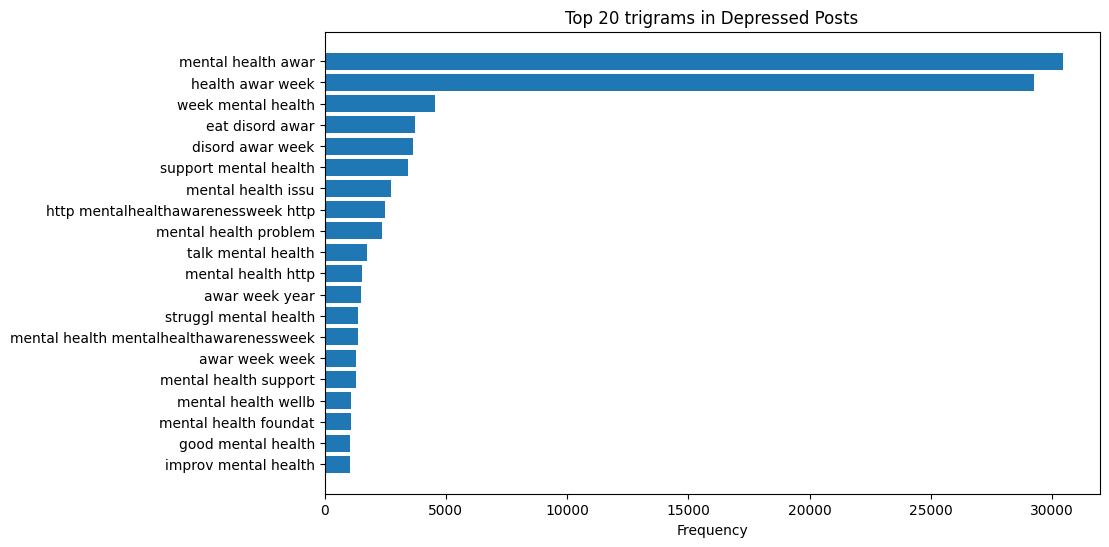

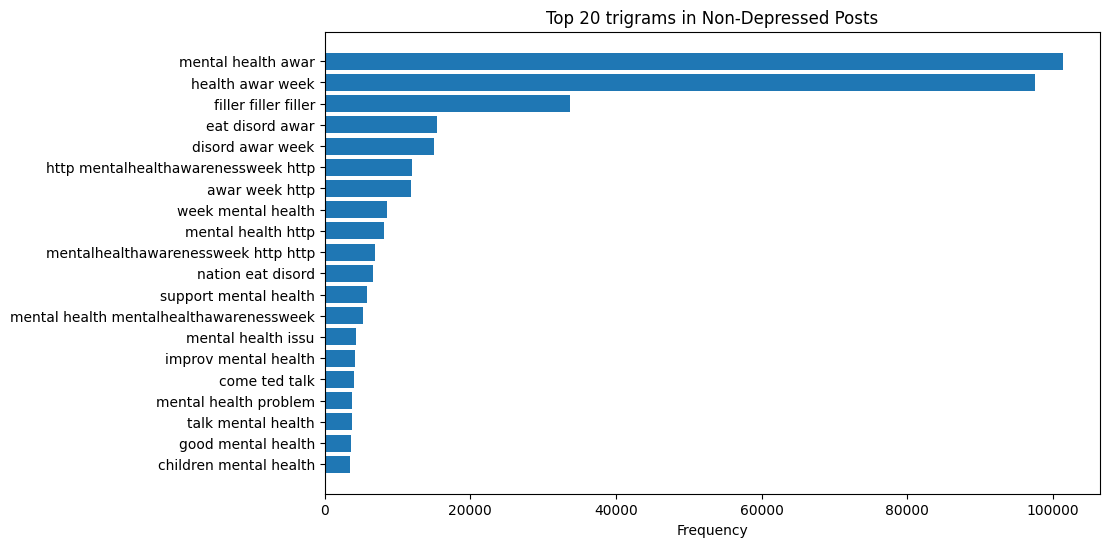

In [116]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts
plot_ngrams(top_depressed_ngrams, "Top 20 trigrams in Depressed Posts")

# Plot for non-depressed posts
plot_ngrams(top_non_depressed_ngrams, "Top 20 trigrams in Non-Depressed Posts")

In [117]:
# Extract the n-grams (without frequencies) from each list
depressed_ngrams = set([ngram for ngram, freq in top_depressed_ngrams])
non_depressed_ngrams = set([ngram for ngram, freq in top_non_depressed_ngrams])

# Find n-grams that appear in both categories
common_ngrams = depressed_ngrams.intersection(non_depressed_ngrams)

# Find n-grams that are unique to each category
depressed_only_ngrams = depressed_ngrams - non_depressed_ngrams
non_depressed_only_ngrams = non_depressed_ngrams - depressed_ngrams

# Display results
print("3-grams common to both depressed and non-depressed posts:")
for ngram in common_ngrams:
    print(ngram)

print("\n3-grams unique to depressed posts:")
for ngram in depressed_only_ngrams:
    print(ngram)

print("\n3-grams unique to non-depressed posts:")
for ngram in non_depressed_only_ngrams:
    print(ngram)


3-grams common to both depressed and non-depressed posts:
mental health awar
health awar week
talk mental health
mental health mentalhealthawarenessweek
mental health problem
eat disord awar
mental health http
mental health issu
http mentalhealthawarenessweek http
week mental health
disord awar week
support mental health
good mental health
improv mental health

3-grams unique to depressed posts:
mental health support
struggl mental health
mental health foundat
awar week week
mental health wellb
awar week year

3-grams unique to non-depressed posts:
come ted talk
awar week http
mentalhealthawarenessweek http http
children mental health
filler filler filler
nation eat disord


understanding positive, negative and neutral sentiments for depressed and non-depressed posts

Depressed posts

In [118]:
# Filter posts by label and sentiment
depressed_positive = df[(df['label'] == 1) & (df['sentiment'] == 'Positive')]['text']
depressed_negative = df[(df['label'] == 1) & (df['sentiment'] == 'Negative')]['text']
depressed_neutral = df[(df['label'] == 1) & (df['sentiment'] == 'Neutral')]['text']

# Get n-grams for each sentiment within the depressed group
top_depressed_positive_ngrams = get_ngrams(depressed_positive, ngram_range=(3, 3), top_n=20)
top_depressed_negative_ngrams = get_ngrams(depressed_negative, ngram_range=(3, 3), top_n=20)
top_depressed_neutral_ngrams = get_ngrams(depressed_neutral, ngram_range=(3, 3), top_n=20)

In [119]:
#display results
print("Top 20 3-grams in Depressed Posts that have positive sentiment:")
for ngram, freq in top_depressed_positive_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 3-grams in Depressed Posts that have negative sentiment:")
for ngram, freq in top_depressed_negative_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 3-grams in Depressed Posts that have neutral sentiment:")
for ngram, freq in top_depressed_neutral_ngrams:
    print(f"{ngram}: {freq}")

Top 20 3-grams in Depressed Posts that have positive sentiment:
mental health awareness: 21344
health awareness week: 20557
week mental health: 2987
https mentalhealthawarenessweek https: 1625
support mental health: 1449
mental health issues: 1333
mental health https: 1092
eating disorders awareness: 1065
disorders awareness week: 1049
mental health support: 973
good mental health: 955
mental health wellbeing: 942
eating disorder awareness: 891
supporting mental health: 890
disorder awareness week: 879
mental health mentalhealthawarenessweek: 872
awareness week week: 857
mental health important: 797
awareness week year: 699
mental health foundation: 686

Top 20 3-grams in Depressed Posts that have negative sentiment:
mental health awareness: 7142
health awareness week: 6907
just want die: 2037
just feel like: 1678
don know anymore: 1677
don want live: 1598
don want die: 1486
just don want: 1423
just don know: 1404
don feel like: 1320
just want end: 1258
feel like shit: 1200
eating diso

Non depressed posts

In [120]:
# Filter posts by label and sentiment
non_depressed_positive = df[(df['label'] == 0) & (df['sentiment'] == 'Positive')]['text']
non_depressed_negative = df[(df['label'] == 0) & (df['sentiment'] == 'Negative')]['text']
non_depressed_neutral = df[(df['label'] == 0) & (df['sentiment'] == 'Neutral')]['text']

# Get n-grams for each sentiment within the depressed group
top_non_depressed_positive_ngrams = get_ngrams(non_depressed_positive, ngram_range=(3, 3), top_n=20)
top_non_depressed_negative_ngrams = get_ngrams(non_depressed_negative, ngram_range=(3, 3), top_n=20)
top_non_depressed_neutral_ngrams = get_ngrams(non_depressed_neutral, ngram_range=(3, 3), top_n=20)

In [121]:
#display results
print("Top 20 3-grams in Non-depressed Posts that have positive sentiment:")
for ngram, freq in top_non_depressed_positive_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 3-grams in Non-depressed Posts that have negative sentiment:")
for ngram, freq in top_non_depressed_negative_ngrams:
    print(f"{ngram}: {freq}")

print("\nTop 20 3-grams in Non-depressed Posts that have neutral sentiment:")
for ngram, freq in top_non_depressed_neutral_ngrams:
    print(f"{ngram}: {freq}")

Top 20 3-grams in Non-depressed Posts that have positive sentiment:
mental health awareness: 68272
health awareness week: 65467
http twitpic com: 13331
filler filler filler: 9188
http bit ly: 8988
lt lt lt: 8425
https mentalhealthawarenessweek https: 8093
amp amp amp: 6920
mental health https: 5725
week mental health: 5555
awareness week https: 4619
eating disorders awareness: 4299
mentalhealthawarenessweek https https: 4291
disorders awareness week: 4220
http tinyurl com: 4218
amp x200b amp: 3882
x200b amp x200b: 3882
mental health mentalhealthawarenessweek: 3522
good mental health: 3478
www youtube com: 3447

Top 20 3-grams in Non-depressed Posts that have negative sentiment:
filler filler filler: 10486
mental health awareness: 10337
health awareness week: 10018
http twitpic com: 6146
help help help: 4632
eating disorder awareness: 4505
disorder awareness week: 4371
http bit ly: 4011
ni ni ni: 3984
http plurk com: 3061
amp x200b amp: 2836
x200b amp x200b: 2836
www reddit com: 2563
ht

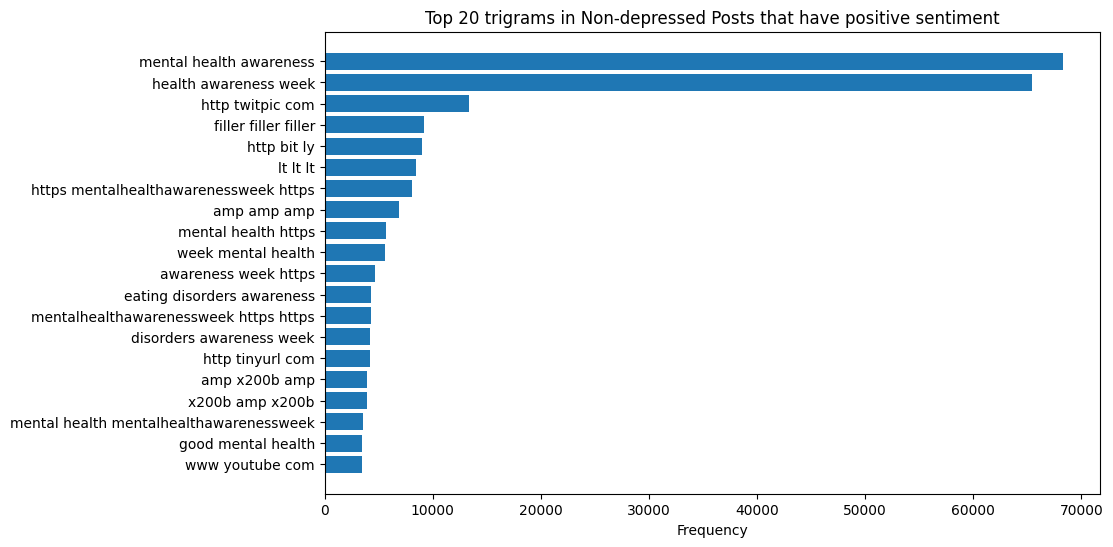

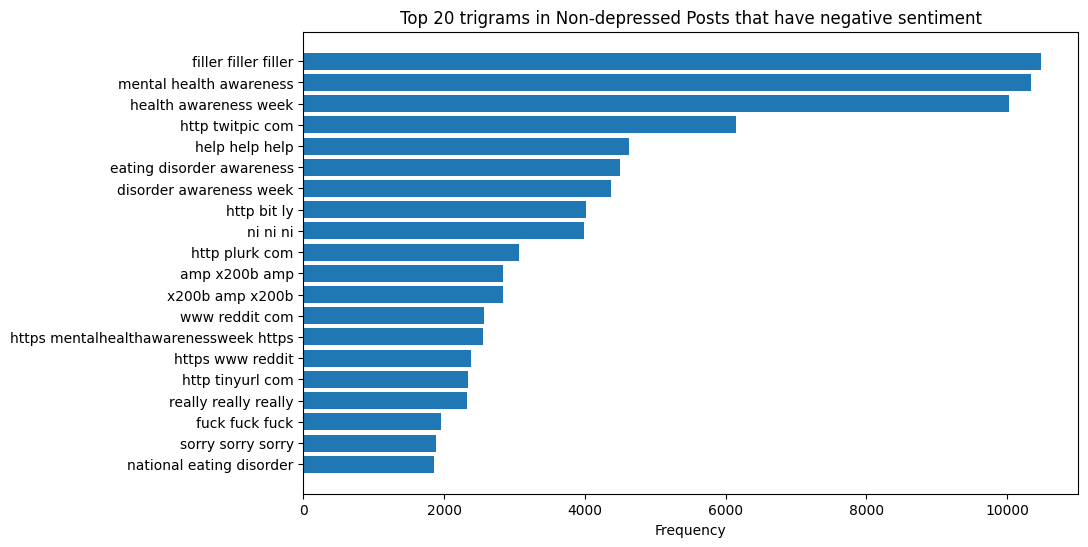

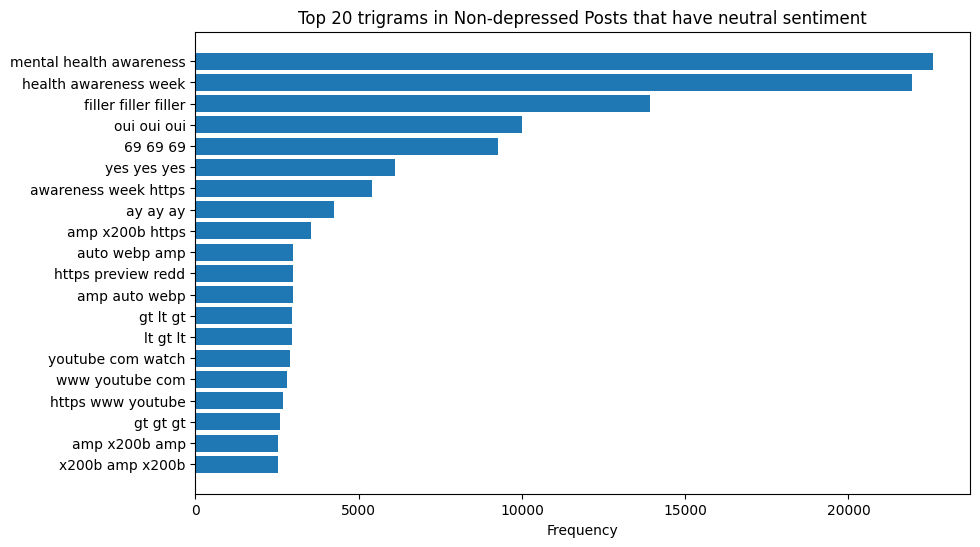

In [122]:
import matplotlib.pyplot as plt

def plot_ngrams(ngrams, title):
    ngram_labels, frequencies = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for depressed posts,positive sentiment
plot_ngrams(top_non_depressed_positive_ngrams, "Top 20 trigrams in Non-depressed Posts that have positive sentiment")

# Plot for depressed posts,negative sentiment
plot_ngrams(top_non_depressed_negative_ngrams, "Top 20 trigrams in Non-depressed Posts that have negative sentiment")

# Plot for depressed posts,neutral sentiment
plot_ngrams(top_non_depressed_neutral_ngrams, "Top 20 trigrams in Non-depressed Posts that have neutral sentiment")

Common Positive 1-grams (Depressed & Non-Depressed): {'mental health https', 'mental health awareness', 'disorders awareness week', 'eating disorders awareness', 'https mentalhealthawarenessweek https', 'mental health mentalhealthawarenessweek', 'week mental health', 'good mental health', 'health awareness week'}
Unique Positive 1-grams in Depressed: {'awareness week week', 'mental health issues', 'mental health support', 'awareness week year', 'eating disorder awareness', 'mental health foundation', 'mental health wellbeing', 'mental health important', 'supporting mental health', 'support mental health', 'disorder awareness week'}
Unique Positive 1-grams in Non-Depressed: {'awareness week https', 'mentalhealthawarenessweek https https', 'www youtube com', 'x200b amp x200b', 'http bit ly', 'lt lt lt', 'amp x200b amp', 'http tinyurl com', 'http twitpic com', 'filler filler filler', 'amp amp amp'}

Common Negative 1-grams (Depressed & Non-Depressed): {'disorder awareness week', 'mental h

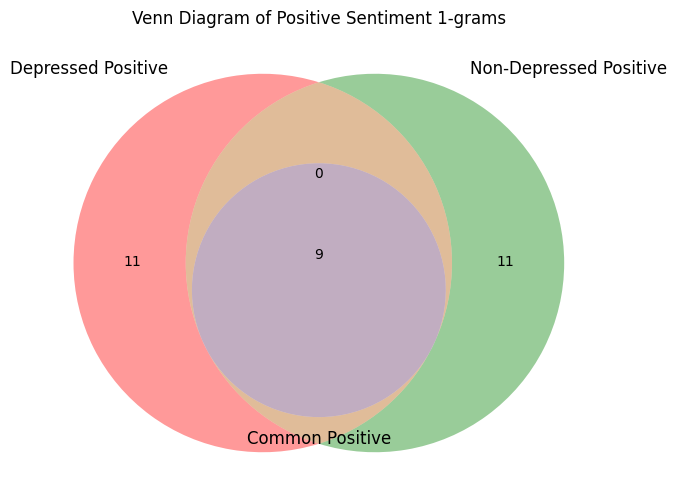

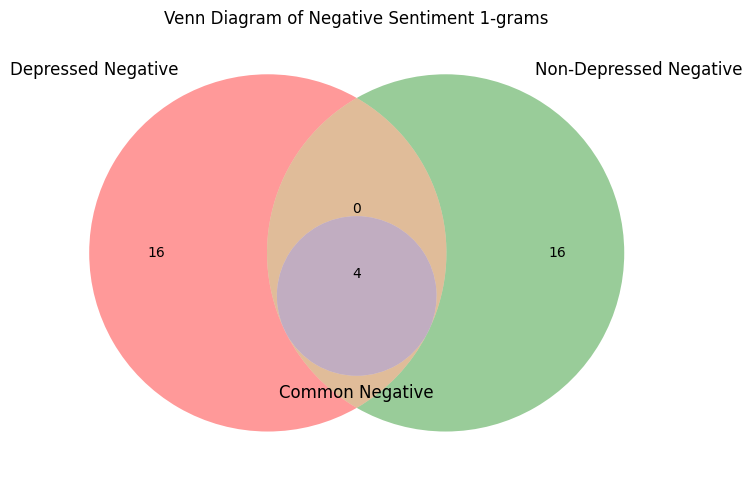

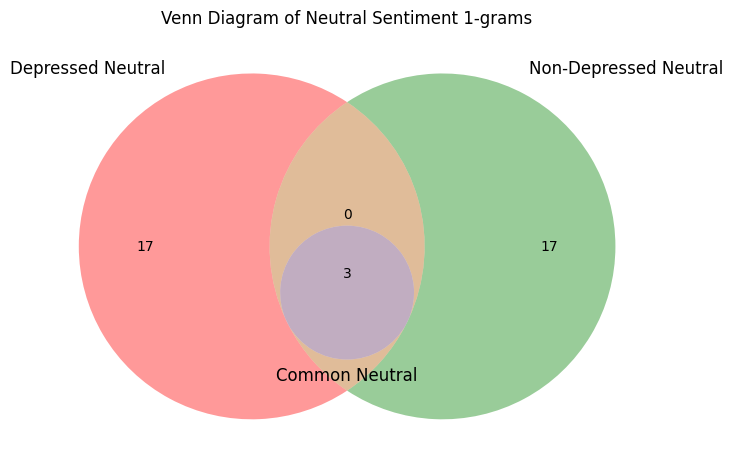

In [123]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Sample data (use your actual data lists here)
# Format: List of tuples (ngram, frequency)

# Extract n-grams from each list (without frequencies)
non_depressed_positive_set = set([ngram for ngram, _ in top_non_depressed_positive_ngrams])
non_depressed_negative_set = set([ngram for ngram, _ in top_non_depressed_negative_ngrams])
non_depressed_neutral_set = set([ngram for ngram, _ in top_non_depressed_neutral_ngrams])

depressed_positive_set = set([ngram for ngram, _ in top_depressed_positive_ngrams])
depressed_negative_set = set([ngram for ngram, _ in top_depressed_negative_ngrams])
depressed_neutral_set = set([ngram for ngram, _ in top_depressed_neutral_ngrams])

# Common and unique n-grams
positive_common_ngrams = depressed_positive_set.intersection(non_depressed_positive_set)
positive_unique_depressed = depressed_positive_set - non_depressed_positive_set
positive_unique_non_depressed = non_depressed_positive_set - depressed_positive_set

negative_common_ngrams = depressed_negative_set.intersection(non_depressed_negative_set)
negative_unique_depressed = depressed_negative_set - non_depressed_negative_set
negative_unique_non_depressed = non_depressed_negative_set - depressed_negative_set

neutral_common_ngrams = depressed_neutral_set.intersection(non_depressed_neutral_set)
neutral_unique_depressed = depressed_neutral_set - non_depressed_neutral_set
neutral_unique_non_depressed = non_depressed_neutral_set - depressed_neutral_set

# Print Results
print("Common Positive 1-grams (Depressed & Non-Depressed):", positive_common_ngrams)
print("Unique Positive 1-grams in Depressed:", positive_unique_depressed)
print("Unique Positive 1-grams in Non-Depressed:", positive_unique_non_depressed)

print("\nCommon Negative 1-grams (Depressed & Non-Depressed):", negative_common_ngrams)
print("Unique Negative 1-grams in Depressed:", negative_unique_depressed)
print("Unique Negative 1-grams in Non-Depressed:", negative_unique_non_depressed)

print("\nCommon Neutral 1-grams (Depressed & Non-Depressed):", neutral_common_ngrams)
print("Unique Neutral 1-grams in Depressed:", neutral_unique_depressed)
print("Unique Neutral 1-grams in Non-Depressed:", neutral_unique_non_depressed)

# Visualization: Venn diagrams for each sentiment category
# Ensure matplotlib_venn is installed with: pip install matplotlib-venn

# Positive Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_positive_set, non_depressed_positive_set, positive_common_ngrams],
      set_labels=('Depressed Positive', 'Non-Depressed Positive', 'Common Positive'))
plt.title("Venn Diagram of Positive Sentiment 1-grams")
plt.show()

# Negative Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_negative_set, non_depressed_negative_set, negative_common_ngrams],
      set_labels=('Depressed Negative', 'Non-Depressed Negative', 'Common Negative'))
plt.title("Venn Diagram of Negative Sentiment 1-grams")
plt.show()

# Neutral Sentiment Venn Diagram
plt.figure(figsize=(8, 6))
venn3([depressed_neutral_set, non_depressed_neutral_set, neutral_common_ngrams],
      set_labels=('Depressed Neutral', 'Non-Depressed Neutral', 'Common Neutral'))
plt.title("Venn Diagram of Neutral Sentiment 1-grams")
plt.show()
